# Monetary Economics: Chapter 11

### Preliminaries

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

from pysolve.model import Model
from pysolve.utils import is_close,round_solution

import matplotlib.pyplot as plt

### Model GROWTH

> Changes to the model:
> In the GROWTH model, I've used the definition of the Tobin's Q from the INSOUT model in Chapter 10
> 
> Original: Q = (Eks*Pe)/(K + IN + Lfd)
>
> Corrected : Q = (Eks*Pe + Lfd)/(K + IN)

In [2]:
def create_growth_model():
    model = Model()
        
    model.set_var_default(0)
    model.var('ADDl', desc='Spread between interest rate on loans and rate on deposits')
    model.var('Bbd', desc='Government bills demanded by commercial banks')
    model.var('Bbs', desc='Government bills supplied to commercial banks')
    model.var('Bcbd', desc='Government bills demanded by Central bank')
    model.var('Bcbs', desc='Government bills supplied by Central bank')
    model.var('Bhd', desc='Demand for government bills from households')
    model.var('Bhs', desc='Government bills supplied to households')
    model.var('Bs', desc='Supply of government bills')
    model.var('BLd', desc='Demand for government bonds')
    model.var('BLs', desc='Supply of government bonds')
    model.var('BLR', desc='Gross bank liquidity ratio')
    model.var('BUR', desc='Burden of personal debt')
    model.var('Ck', desc='Real consumption')
    model.var('CAR', desc='Capital adequacy ratio of banks')
    model.var('CG', desc='Capital gains on government bonds')
    model.var('CONS', desc='Consumption at current prices')
    model.var('Ekd', desc='Number of equities demanded')
    model.var('Eks', desc='Number of equities supplied by firms')
    model.var('ER', desc='Employment rate')
    model.var('Fb', desc='Realized banks profits')
    model.var('Fbt', desc='Target profits of banks')
    model.var('Fcb', desc='Central bank "profits"')
    model.var('Ff', desc='Realized entrepreneurial profits')
    model.var('Fft', desc='Planned entrepreneurial profits')
    model.var('FDb', desc='Dividends of banks')
    model.var('FDf', desc='Dividends of firms')
    model.var('FUb', desc='Retained earnings of banks')
    model.var('FUbt', desc='Targt retained earnings of banks')
    model.var('FUf', desc='Retained earnings of firms')
    model.var('FUft', desc='Planned retained earnings of firms')
    model.var('G', desc='Government expenditures')
    model.var('Gk', desc='Real government expenditures')
    model.var('GD', desc='Government debt')
    model.var('GL', desc='Gross amount of new personal loans')
    model.var('GRk', desc='growth_mod of real capital stock')
    model.var('Hbd', desc='Cash required by banks')
    model.var('Hbs', desc='Cash supplied to banks')
    model.var('Hhd', desc='Households demand for cash')
    model.var('Hhs', desc='Cash supplied to households')
    model.var('Hs', desc='Total supply of cash')
    model.var('HCe', desc='Expected historical costs')
    model.var('INV', desc='Gross investment')
    model.var('Ik', desc='Gross investment in real terms')
    model.var('IN', desc='Stock of inventories at current costs')
    model.var('INk', desc='Real inventories')
    model.var('INke', desc='Expected real inventories')
    model.var('INkt', desc='Target level of real inventories')
    model.var('K', desc='Capital stock')
    model.var('Kk', desc='Real capital stock')
    model.var('Lfd', desc='Demand for loans by firms')
    model.var('Lfs', desc='Supply of loans to firms')
    model.var('Lhd', desc='Demand for loans by households')
    model.var('Lhs', desc='Loans supplied to households')
    model.var('Md', desc='Deposits demanded by households')
    model.var('Ms', desc='Deposits supplied by banks')
    model.var('N', desc='Employment level')
    model.var('Nt', desc='Desired employment level')
    model.var('NHUC', desc='Normal historic unit cost')
    model.var('NL', desc='Net flow of new loans to the household sector')
    model.var('NLk', desc='Real flow of new loans to the household sector')
    model.var('NPL', desc='Non-Performing loans')
    model.var('NPLke', desc='Expected proportion of Non-Performing Loans')
    model.var('NUC', desc='Normal unit cost')
    model.var('OFb', desc='Own funds of banks')
    model.var('OFbe', desc='Short-run target for banks own funds')
    model.var('OFbt', desc='Long-run target for banks own funds')
    model.var('omegat', desc='Target real wage for workers')
    model.var('P', desc='Price level')
    model.var('Pbl', desc='Price of government bonds')
    model.var('Pe', desc='Price of equities')
    model.var('PE', desc='Price earnings ratio')
    model.var('PI', desc='Price inflation')
    model.var('PR', desc='Lobor productivity')
    model.var('PSBR', desc='Government deficit')
    model.var('Q', desc="Tobin's Q")
    model.var('Rb', desc='Interest rate on government bills')
    model.var('Rbl', desc='Interest rate on bonds')
    model.var('Rk', desc='Dividend yield of firms')
    model.var('Rl', desc='Interest rate on loans')
    model.var('Rm', desc='Interest rate on deposits')
    model.var('REP', desc='Personal loans repayments')
    model.var('RRl', desc='Real interest rate on loans')
    model.var('S', desc='Sales at current prices')
    model.var('Sk', desc='Real sales')
    model.var('Ske', desc='Expected real sales')
    model.var('T', desc='Taxes')
    model.var('U', desc='Capital utilization proxy')
    model.var('UC', desc='Unit costs')
    model.var('V', desc='Wealth of households')
    model.var('Vk', desc='Real wealth of households')
    model.var('Vfma', desc='Investible wealth of households')
    model.var('W', desc='Wage rate')
    model.var('WB', desc='The wage bill')
    model.var('Y', desc='Output at current prices (nominal GDP)')
    model.var('Yk', desc='Real output')
    model.var('YDhs', desc='Haig-Simons measure of disposable income')
    model.var('YDr', desc='Regular disposable income')
    model.var('YDkr', desc='Regular real disposable income')
    model.var('YDkre', desc='Expected regular real disposable income')
    model.var('YP', desc='Personal income')

    model.var('eta', desc='Ratio of new loans to personal income')
    model.var('phi', desc='Mark-up on unit costs')
    model.var('phit', desc='Ideal mark-up on unit costs')
    model.var('z1a', desc='Is one if bank liquidity ratio is below bottom range')
    model.var('z1b', desc='Is one if bank liquidity ratio is below bottom range')
    model.var('z2a', desc='Is one if bank liquidity ratio is above top range')
    model.var('z2b', desc='Is one if bank liquidity ratio is above top range')
    model.var('z3', desc='Parameter in wage aspiration equation')
    model.var('z4', desc='Parameter in wage aspiration equation')
    model.var('z5', desc='Parameter in wage aspiration equation')
    model.var('sigmase', desc='Opening inventories to expected sales ratio')
    
    model.param('alpha1', desc='Propensity to consume out of income')
    model.param('alpha2', desc='Propensity to consume out of wealth')
    model.param('beta', desc='Parameter in expectation formations on real sales')
    model.param('betab', desc='Spped of adjustment of banks own funds')
    model.param('bot', desc='Bottom value for bank net liquidity ratio')
    model.param('delta', desc='Rate of depreciation of fixed capital')
    model.param('deltarep', desc='Ratio of personal loans repayments to stock of loans')
    model.param('eps', desc='Parameter in expectation formations on real disposable income')
    model.param('eps2', desc='Speed of adjustment of mark-up')
    model.param('epsb', desc='Speed of adjustment in expected proportion of non-performing loans')
    model.param('epsrb', desc='Speed of adjustment in the real interest rate on bills')
    model.param('eta0', desc='Ratio of new loans to personal income - exogenous component')
    model.param('etan', desc='Speed of adjustment of actual employment to desired employment')
    model.param('etar', desc='Relation between the ratio of new loans to personal income and the interest rate on loans')
    model.param('gamma', desc='Speed of adjustment of inventories to the target level')
    model.param('gamma0', desc='Exogenous growth_mod in the real stock of capital')
    model.param('gammar', desc='Relation between the real interest rate and growth_mod in the stock of capital')
    model.param('gammau', desc='Relation between the utilization rate and growth_mod in the stock of capital')
    model.param('lambda20', desc='Parameter in households demand for bills')
    model.param('lambda21', desc='Parameter in households demand for bills')
    model.param('lambda22', desc='Parameter in households demand for bills')
    model.param('lambda23', desc='Parameter in households demand for bills')
    model.param('lambda24', desc='Parameter in households demand for bills')
    model.param('lambda25', desc='Parameter in households demand for bills')
    model.param('lambda30', desc='Parameter in households demand for bonds')
    model.param('lambda31', desc='Parameter in households demand for bonds')
    model.param('lambda32', desc='Parameter in households demand for bonds')
    model.param('lambda33', desc='Parameter in households demand for bonds')
    model.param('lambda34', desc='Parameter in households demand for bonds')
    model.param('lambda35', desc='Parameter in households demand for bonds')
    model.param('lambda40', desc='Parameter in households demand for equities')
    model.param('lambda41', desc='Parameter in households demand for equities')
    model.param('lambda42', desc='Parameter in households demand for equities')
    model.param('lambda43', desc='Parameter in households demand for equities')
    model.param('lambda44', desc='Parameter in households demand for equities')
    model.param('lambda45', desc='Parameter in households demand for equities')
    model.param('lambdab', desc='Parameter determining dividends of banks')
    model.param('lambdac', desc='Parameter in households demand for cash')
    model.param('psid', desc='Ratio of dividends to gross profits')
    model.param('psiu', desc='Ratio of retained earnings to investments')
    model.param('ro', desc='Reserve requirement parameter')
    model.param('sigman', desc='Parameter of influencing normal historic unit costs')
    model.param('theta', desc='Income tax rate')
    model.param('top', desc='Top value for bank net liquidity ratio')
    model.param('xim1', desc='Parameter in the equation for setting interest rate on deposits')
    model.param('xim2', desc='Parameter in the equation for setting interest rate on deposits')
    model.param('omega0', desc='Parameter influencing the target real wage for workers')
    model.param('omega1', desc='Parameter influencing the target real wage for workers')
    model.param('omega2', desc='Parameter influencing the target real wage for workers')
    model.param('omega3', desc='Speed of adjustment of wages to target value')


    model.param('ADDbl', desc='Spread between long-term interest rate and rate on bills')
    model.param('BANDb', desc='Lower range of the flat Phillips curve')
    model.param('BANDt', desc='Upper range of the flat Phillips curve')
    model.param('GRg', desc='growth_mod of real government expenditures')
    model.param('GRpr', desc='growth_mod rate of productivity')
    model.param('NCAR', desc='Normal capital adequacy ratio of banks')
    model.param('Nfe', desc='Full employment level')
    model.param('NPLk', desc='Proportion of Non-Performing loans')
    model.param('RA', desc='Random shock to expectations on real sales')
    model.param('Rbbar', desc='Interest rate on bills, set exogenously')
    model.param('Rln', desc='Normal interest rate on loans')
    model.param('RRb', desc='Real interest rate on bills')
    model.param('sigmas', desc='Realized inventories to sales ratio')
    model.param('sigmat', desc='Target inventories to sales ratio')


    # Box 11.1 : Firms' equations
    # ---------------------------
    model.add('Yk = Ske + INke - INk(-1)')          # 11.1 : Real output
    model.add('Ske = beta*Sk + (1-beta)*Sk(-1)*(1 + (GRpr + RA))') # 11.2 : Expected real sales
    model.add('INke = INk(-1) + gamma*(INkt - INk(-1))')  # 11.3 : Long-run inventory target
    model.add('INkt = sigmat*Ske')                  # 11.4 : Short-run inventory target
    model.add('INk - INk(-1) = Yk - Sk - NPL/UC')   # 11.5 : Actual real inventories
    model.add('Kk = Kk(-1)*(1 + GRk)')              # 11.6 : Real capital stock
    model.add('GRk = gamma0 + gammau*U(-1) - gammar*RRl')  # 11.7 : Growth of real capital stock
    model.add('U = Yk/Kk(-1)')                      # 11.8 : Capital utilization proxy
    model.add('RRl = ((1 + Rl)/(1 + PI)) - 1')      # 11.9 : Real interest rate on loans
    model.add('PI = (P - P(-1))/P(-1)')             # 11.10 : Rate of price inflation
    model.add('Ik = d(Kk) + delta*Kk(-1)')          # 11.11 : Real gross investment

    # Box 11.2 : Firms' equations
    # ---------------------------
    model.add('Sk = Ck + Gk + Ik')                  # 11.12 : Actual real sales
    model.add('S = Sk*P')                           # 11.13 : Value of realized sales
    model.add('IN = INk*UC')                        # 11.14 : Inventories valued at current cost
    model.add('INV = Ik*P')                         # 11.15 : Nominal gross investment
    model.add('K = Kk*P')                           # 11.16 : Nomincal value of fixed capital
    model.add('Y = Sk*P + d(INk)*UC')               # 11.17 : Nomincal GDP

    # Box 11.3 : Firms' equations
    # ---------------------------
    # 11.18 : Real wage aspirations
    model.add('omegat = exp(omega0 + omega1*log(PR) + omega2*log(ER + z3*(1 - ER) - z4*BANDt + z5*BANDb))')
    model.add('ER = N(-1)/Nfe(-1)')                 # 11.19 : Employment rate
    # 11.20 : Switch variables
    model.add('z3 = if_true(ER > (1-BANDb)) * if_true(ER <= (1+BANDt))')
    model.add('z4 = if_true(ER > (1+BANDt))')
    model.add('z5 = if_true(ER < (1-BANDb))')
    model.add('W - W(-1) = omega3*(omegat*P(-1) - W(-1))')  # 11.21 : Nominal wage
    model.add('PR = PR(-1)*(1 + GRpr)')             # 11.22 : Labor productivity
    model.add('Nt = Yk/PR')                         # 11.23 : Desired employment
    model.add('N - N(-1) = etan*(Nt - N(-1))')      # 11.24 : Actual employment
    model.add('WB = N*W')                           # 11.25 : Nominal wage bill
    model.add('UC = WB/Yk')                         # 11.26 : Actual unit cost
    model.add('NUC = W/PR')                         # 11.27 : Normal unit cost
    model.add('NHUC = (1 - sigman)*NUC + sigman*(1 + Rln(-1))*NUC(-1)')  # 11.28 : Normal historic unit cost

    # Box 11.4 : Firms' equations
    # ---------------------------
    model.add('P = (1 + phi)*NHUC')                 # 11.29 : Normal-cost pricing
    model.add('phi - phi(-1) = eps2*(phit(-1) - phi(-1))')  # 11.30 : Actual mark-up
    # 11.31 : Ideal mark-up
    model.add('phit = (FDf + FUft + Rl(-1)*(Lfd(-1) - IN(-1)))/((1 - sigmase)*Ske*UC + (1 + Rl(-1))*sigmase*Ske*UC(-1))')
    model.add('HCe = (1 - sigmase)*Ske*UC + (1 + Rl(-1))*sigmase*Ske*UC(-1)')  # 11.32 : Expected historical costs
    model.add('sigmase = INk(-1)/Ske')              # 11.33 : Opening inventories to expected sales ratio
    model.add('Fft = FUft + FDf + Rl(-1)*(Lfd(-1) - IN(-1))')  # 11.34 : Planned entrepeneurial profits of firmss
    model.add('FUft = psiu*INV(-1)')                # 11.35 : Planned retained earnings of firms
    model.add('FDf = psid*Ff(-1)')                  # 11.36 : Dividends of firms

    # Box 11.5 : Firms' equations
    # ---------------------------
    model.add('Ff = S - WB + d(IN) - Rl(-1)*IN(-1)')  # 11.37 : Realized entrepeneurial profits
    model.add('FUf = Ff - FDf - Rl(-1)*(Lfd(-1) - IN(-1)) + Rl(-1)*NPL')  # 11.38 : Retained earnings of firms
    # 11.39 : Demand for loans by firms
    model.add('Lfd - Lfd(-1) = INV + d(IN) - FUf - d(Eks)*Pe - NPL')
    model.add('NPL = NPLk*Lfs(-1)')                 # 11.40 : Defaulted loans
    model.add('Eks - Eks(-1) = ((1 - psiu)*INV(-1))/Pe')  # 11.41 : Supply of equities issued by firms
    model.add('Rk = FDf/(Pe(-1)*Ekd(-1))')          # 11.42 : Dividend yield of firms
    model.add('PE = Pe/(Ff/Eks(-1))')               # 11.43 : Price earnings ratio
    model.add('Q = (Eks*Pe + Lfd)/(K + IN)')        # 11.44 : Tobin's Q ratio

    # Box 11.6 : Households' equations
    # --------------------------------
    model.add('YP = WB + FDf + FDb + Rm(-1)*Md(-1) + Rb(-1)*Bhd(-1) + BLs(-1)')  # 11.45 : Personal income
    model.add('T = theta*YP')                       # 11.46 : Income taxes
    model.add('YDr = YP - T - Rl(-1)*Lhd(-1)')      # 11.47 : Regular disposable income
    model.add('YDhs = YDr + CG')                    # 11.48 : Haig-Simons disposable income
    # !1.49 : Capital gains
    model.add('CG = d(Pbl)*BLd(-1) + d(Pe)*Ekd(-1) + d(OFb)')
    # 11.50 : Wealth
    model.add('V - V(-1) = YDr - CONS + d(Pe)*Ekd(-1) + d(Pbl)*BLs(-1) + d(OFb)')
    model.add('Vk = V/P')                           # 11.51 : Real staock of wealth
    model.add('CONS = Ck*P')                        # 11.52 : Consumption
    model.add('Ck = alpha1*(YDkre + NLk) + alpha2*Vk(-1)')  # 11.53 : Real consumption
    model.add('YDkre = eps*YDkr + (1 - eps)*YDkr(-1)*(1 + GRpr)')  # 11.54 : Expected real regular disposable income
    model.add('YDkr = YDr/P - d(P)*Vk(-1)/P')  # 11.55 : Real regular disposable income

    # Box 11.7 : Households' equations
    # --------------------------------
    model.add('GL = eta*YDr')                       # 11.56 : Gross amount of new personal loans
    model.add('eta = eta0 - etar*RRl')              # 11.57 : New loans to personal income ratio
    model.add('NL = GL - REP')                      # 11.58 : Net amount of new personal loans
    model.add('REP = deltarep*Lhd(-1)')             # 11.59 : Personal loans repayments
    model.add('Lhd - Lhd(-1) = GL - REP')           # 11.60 : Demand for personal loans
    model.add('NLk = NL/P')                         # 11.61 : Real amount of new personal loans
    model.add('BUR = (REP + Rl(-1)*Lhd(-1))/YDr(-1)')  # 11.62 : Burden of personal debt

    # Box 11.8 : Households equations - portfolio decisions
    # -----------------------------------------------------

    # 11.64 : Demand for bills
    model.add('Bhd = Vfma(-1)*(lambda20 + lambda22*Rb(-1) - lambda21*Rm(-1) - lambda24*Rk(-1) - lambda23*Rbl(-1) - lambda25*YDr/V)')
    # 11.65 : Demand for bonds
    model.add('BLd = Vfma(-1)*(lambda30 - lambda32*Rb(-1) - lambda31*Rm(-1) - lambda34*Rk(-1) + lambda33*Rbl(-1) - lambda35*YDr/V)/Pbl')
    # 11.66 : Demand for equities - normalized to get the price of equitities
    model.add('Pe = Vfma(-1)*(lambda40 - lambda42*Rb(-1) - lambda41*Rm(-1) + lambda44*Rk(-1) - lambda43*Rbl(-1) - lambda45*YDr/V)/Ekd')
    model.add('Md = Vfma - Bhd - Pe*Ekd - Pbl*BLd + Lhd')  # 11.67 : Money deposits - as a residual
    model.add('Vfma = V - Hhd - OFb')               # 11.68 : Investible wealth
    model.add('Hhd = lambdac*CONS')                 # 11.69 : Households' demand for cash
    model.add('Ekd = Eks')                          # 11.70 : Stock market equilibrium

    # Box 11.9 : Government's equations
    # ---------------------------------
    model.add('G = Gk*P')                           # 11.71 : Pure government expenditures
    model.add('Gk = Gk(-1)*(1 + GRg)')              # 11.72 : Real government expenditures
    model.add('PSBR = G + BLs(-1) + Rb(-1)*(Bbs(-1) + Bhs(-1)) - T')  # 11.73 : Government deficit
    # 11.74 : New issues of bills
    model.add('Bs - Bs(-1) = G - T - d(BLs)*Pbl + Rb(-1)*(Bhs(-1) + Bbs(-1)) + BLs(-1)')
    model.add('GD = Bbs + Bhs + BLs*Pbl + Hs')      # 11.75 : Government debt

    # Box 11.10 : The Central bank's equations
    # ----------------------------------------
    model.add('Fcb = Rb(-1)*Bcbd(-1)')              # 11.76 : Central bank profits
    model.add('BLs = BLd')                          # 11.77 : Bonds are supplied on demand
    model.add('Bhs = Bhd')                          # 11.78 : Household bills supplied on demand
    model.add('Hhs = Hhd')                          # 11.79 : Cash supplied on demand
    model.add('Hbs = Hbd')                          # 11.80 : Reserves supplied on demand
    model.add('Hs = Hbs + Hhs')                     # 11.81 : Total supply of cash
    model.add('Bcbd = Hs')                          # 11.82 : Central bankd 
    model.add('Bcbs = Bcbd')                        # 11.83 : Supply of bills to Central bank
    model.add('Rb = Rbbar')                         # 11.84 : Interest rate on bills set exogenously
    model.add('Rbl = Rb + ADDbl')                   # 11.85 : Long term interest rate
    model.add('Pbl = 1/Rbl')                        # 11.86 : Price of long-term bonds

    # Box 11.11 : Commercial Bank's equations
    # ---------------------------------------
    model.add('Ms = Md')                            # 11.87 : Bank deposits supplied on demand
    model.add('Lfs = Lfd')                          # 11.88 : Loans to firms supplied on demand
    model.add('Lhs = Lhd')                          # 11.89 : Personal loans supplied on demand
    model.add('Hbd = ro*Ms')                        # 11.90 : Reserve requirements of banks
    # 11.91 : Bills supplied to banks
    model.add('Bbs - Bbs(-1) = d(Bs) - d(Bhs) - d(Bcbs)')
    # 11.92 : Balance sheet constraint of banks
    model.add('Bbd = Ms + OFb - Lfs - Lhs - Hbd') 
    model.add('BLR = Bbd/Ms')                       # 11.93 : Bank liquidity ratio
    # 11.94 : Deposit interest rate
    model.add('Rm - Rm(-1) = z1a*xim1 + z1b*xim2 - z2a*xim1 - z2b*xim2')
    # 11.95-97 : Mechanism for determining changes to the interest rate on deposits
    model.add('z2a = if_true(BLR(-1) > (top + .05))')
    model.add('z2b = if_true(BLR(-1) > top)')
    model.add('z1a = if_true(BLR(-1) <= bot)')
    model.add('z1b = if_true(BLR(-1) <= (bot -.05))')

    # Box 11.12 : Commercial bank's equations
    # ---------------------------------------
    model.add('Rl = Rm + ADDl')                     # 11.98 : Loan interest rate
    model.add('OFbt = NCAR*(Lfs(-1) + Lhs(-1))')    # 11.99 : Long-run own funds target
    model.add('OFbe = OFb(-1) + betab*(OFbt - OFb(-1))')  # 11.100 : Short-run own funds target
    model.add('FUbt = OFbe - OFb(-1) + NPLke*Lfs(-1)')  # 11.101 : Target retained earnings of banks
    model.add('NPLke = epsb*NPLke(-1) + (1 - epsb)*NPLk(-1)')  # 11.102 : Expected proportion of non-performaing loans
    model.add('FDb = Fb - FUb')                     # 11.103 : Dividends of banks
    model.add('Fbt = lambdab*Y(-1) + (OFbe - OFb(-1) + NPLke*Lfs(-1))')  # 11.104 : Target profits of banks
    # 11.105 : Actual profits of banks
    model.add('Fb = Rl(-1)*(Lfs(-1) + Lhs(-1) - NPL) + Rb(-1)*Bbd(-1) - Rm(-1)*Ms(-1)')
    # 11.106 : Lending mark-up over deposit rate
    model.add('ADDl = (Fbt - Rb(-1)*Bbd(-1) + Rm*(Ms(-1) - (1 - NPLke)*Lfs(-1) - Lhs(-1)))/((1 - NPLke)*Lfs(-1) + Lhs(-1))')
    model.add('FUb = Fb - lambdab*Y(-1)')           # 11.107 : Actual retained earnings
    model.add('OFb - OFb(-1) = FUb - NPL')          # 11.108 : Own funds of banks
    model.add('CAR = OFb/(Lfs + Lhs)')              # 11.109 : Actual capital capacity ratio

    return model

growth_parameters = {'alpha1': 0.75,
                     'alpha2': 0.064,
                     'beta': 0.5,
                     'betab': 0.4,
                     'gamma': 0.15,
                     'gamma0': 0.00122,
                     'gammar': 0.1,
                     'gammau': 0.05,
                     'delta': 0.10667,
                     'deltarep': 0.1,
                     'eps': 0.5,
                     'eps2': 0.8,
                     'epsb': 0.25,
                     'epsrb': 0.9,
                     'eta': 0.04918,
                     'eta0': 0.07416,
                     'etan': 0.6,
                     'etar': 0.4,
                     'theta': 0.22844,
                     'lambda20': 0.25,
                     'lambda21': 2.2,
                     'lambda22': 6.6,
                     'lambda23': 2.2,
                     'lambda24': 2.2,
                     'lambda25': 0.1,
                     'lambda30': -0.04341,
                     'lambda31': 2.2,
                     'lambda32': 2.2,
                     'lambda33': 6.6,
                     'lambda34': 2.2,
                     'lambda35': 0.1,
                     'lambda40': 0.67132,
                     'lambda41': 2.2,
                     'lambda42': 2.2,
                     'lambda43': 2.2,
                     'lambda44': 6.6,
                     'lambda45': 0.1,
                     'lambdab': 0.0153,
                     'lambdac': 0.05,
                     'xim1': 0.0008,
                     'xim2': 0.0007,
                     'ro': 0.05,
                     'sigman': 0.1666,
                     'sigmase': 0.16667,
                     'sigmat': 0.2,
                     'phi': 0.26417,
                     'phit': 0.26417,
                     'psid': 0.15255,
                     'psiu': 0.92,
                     'omega0': -0.20594,
                     'omega1': 1,
                     'omega2': 2,
                     'omega3': 0.45621
                     }

growth_exogenous = [('ADDbl', 0.02),
                    ('BANDt', 0.01),
                    ('BANDb', 0.01),
                    ('bot', 0.05),
                    ('GRg', 0.03),
                    ('GRpr', 0.03),
                    ('Nfe', 87.181),
                    ('NCAR', 0.1),
                    ('NPLk', 0.02),
                    ('Rbbar', 0.035),
                    ('Rln', 0.07),
                    ('RA', 0),
                    ('top', 0.12),

                    ('ADDl', 0.04592),
                    ('BLR', 0.1091),
                    ('BUR', 0.06324),
                    ('Ck', 7334240),
                    ('CAR', 0.09245),
                    ('CONS', 52603100),
                    ('ER', 1),
                    ('Fb', 1744130),
                    ('Fbt', 1744140),
                    ('Ff', 18081100),
                    ('Fft', 18013600),
                    ('FDb', 1325090),
                    ('FDf', 2670970),
                    ('FUb', 419039),
                    ('FUf', 15153800),
                    ('FUft', 15066200),
                    ('G', 16755600),
                    ('Gk', 2336160),
                    ('GL', 2775900),
                    ('GRk', 0.03001),
                    ('INV', 16911600),
                    ('Ik', 2357910),
                    ('N', 'Nfe'),
                    ('Nt', 'Nfe'),
                    ('NHUC', 5.6735),
                    ('NL', 683593),
                    ('NLk', 95311),
                    ('NPL', 309158),
                    ('NPLke', 0.02),
                    ('NUC', 5.6106),
                    ('omegat', 112852),
                    ('P', 7.1723),
                    ('Pbl', 18.182),
                    ('Pe', 17937),
                    ('PE', 5.07185),
                    ('PI', 0.0026),
                    ('PR', 138659),
                    ('PSBR', 1894780),
                    ('Q', 0.77443),
                    ('Rb', 0.035),
                    ('Rbl', 0.055),
                    ('Rk', 0.03008),
                    ('Rl', 0.06522),
                    ('Rm', 0.0193),
                    ('REP', 2092310),
                    ('RRb', 0.03232),
                    ('RRl', 0.06246),
                    ('S', 86270300),
                    ('Sk', 12028300),
                    ('Ske', 'Sk'),
                    ('T', 17024100),
                    ('U', 0.70073),
                    ('UC', 5.6106),
                    ('W', 777968),
                    ('WB', 67824000),
                    ('Y', 86607700),
                    ('Yk', 12088400),
                    ('YDr', 56446400),
                    ('YDkr', 7813270),
                    ('YDkre', 7813290),
                    ('YP', 73158700),
                    ('z1a', 0),
                    ('z1b', 0),
                    ('z2a', 0),
                    ('z2b', 0),
                    ]

                          
growth_variables = [('Bbd', 4388930),
                    ('Bbs', 4389790),
                    ('Bcbd', 4655690),
                    ('Bcbs', 4655690),
                    ('Bhd', 33396900),
                    ('Bhs', 'Bhd'),
                    ('Bs', 42484800),
                    ('BLd', 840742),
                    ('BLs', 'BLd'),
                    ('GD', 57728700),
                    ('Ekd', 5112.6001),
                    ('Eks', 'Ekd'),
                    ('Hbd', 2025540),
                    ('Hbs', 'Hbd'),
                    ('Hhd', 2630150),
                    ('Hhs', 'Hhd'),
                    ('Hs', 'Hbd + Hhd'),
                    ('IN', 11585400),
                    ('INk', 2064890),
                    ('INke', 2405660),
                    ('INkt', 'INk'),
                    ('K', 127444000),
                    ('Kk', 17768900),
                    ('Lfd', 15962900),
                    ('Lfs', 'Lfd'),
                    ('Lhd', 21606600),
                    ('Lhs', 'Lhd'),
                    ('Md', 40510800),
                    ('Ms', 'Md'),
                    ('OFb', 3473280),
                    ('OFbe', 3782430),
                    ('OFbt', 3638100),
                    ('V', 165395000),
                    ('Vfma', 159291000),
                    ('Vk', 22576100),
                    ]


### Scenario: Model GROWTH, baseline

In [3]:
baseline = create_growth_model()
baseline.set_values(growth_parameters)
baseline.set_values(growth_exogenous)
baseline.set_values(growth_variables)

for _ in range(100):
    baseline.solve(iterations=200, threshold=1e-6)


### Scenario: Model GROWTH, Increase in the target real wage rate

In [4]:
omega0 = create_growth_model()
omega0.set_values(growth_parameters)
omega0.set_values(growth_exogenous)
omega0.set_values(growth_variables)

for _ in range(10):
    omega0.solve(iterations=200, threshold=1e-6)

omega0.set_values({'omega0': -0.15})

for _ in range(90):
    omega0.solve(iterations=200, threshold=1e-6)


###### Figure 11.2A

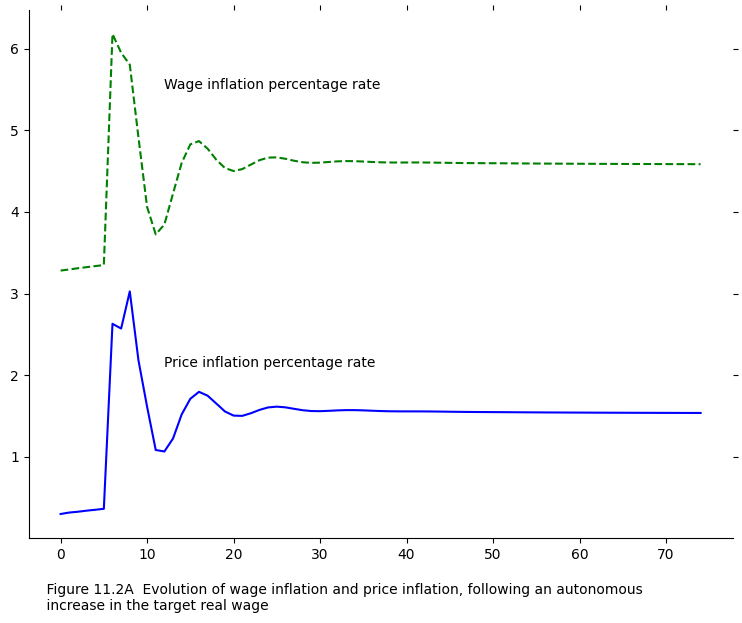

In [5]:
caption = '''
    Figure 11.2A  Evolution of wage inflation and price inflation, following an autonomous
    increase in the target real wage'''

pidata = list()
widata = list()
for i in range(5, 80):
    s = omega0.solutions[i]
    s_1 = omega0.solutions[i-1]
    pidata.append(s['PI']*100)
    widata.append((s['W']/s_1['W'] - 1)*100)

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
#axes.set_ylim(0.975, 1.034)

axes.plot(pidata, linestyle='-', color='b')
axes.plot(widata, linestyle='--', color='g')

# add labels
plt.text(12, 2.1, 'Price inflation percentage rate')
plt.text(12, 5.5, 'Wage inflation percentage rate')
fig.text(0.1, -.05, caption);

###### Figure 11.2B

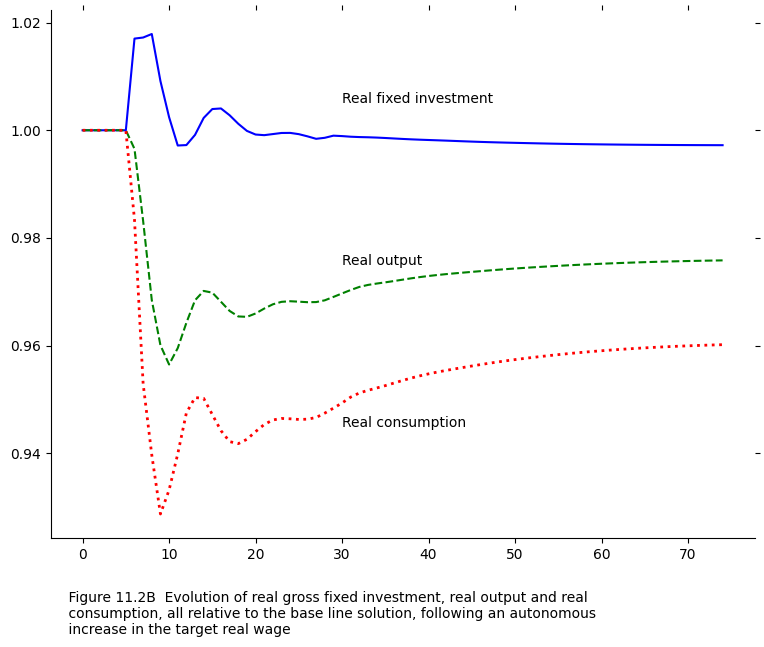

In [6]:
caption = '''
    Figure 11.2B  Evolution of real gross fixed investment, real output and real
    consumption, all relative to the base line solution, following an autonomous
    increase in the target real wage'''

idata = list()
ydata = list()
cdata = list()
for i in range(5, 80):
    s = omega0.solutions[i]
    base = baseline.solutions[i]
    idata.append(s['Ik']/base['Ik'])
    ydata.append(s['Yk']/base['Yk'])
    cdata.append(s['Ck']/base['Ck'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
#axes.set_ylim(0.975, 1.034)

axes.plot(idata, linestyle='-', color='b')
axes.plot(ydata, linestyle='--', color='g')
axes.plot(cdata, linestyle=':', linewidth=2, color='r')

# add labels
plt.text(30, 1.005, 'Real fixed investment')
plt.text(30, 0.975, 'Real output')
plt.text(30, 0.945, 'Real consumption')
fig.text(0.1, -.1, caption);

### Scenario: Model GROWTH, increase in target real wage rate which does not affect long-run real interest rate on bills

In [7]:
omega0_rbbar = create_growth_model()
omega0_rbbar.set_values(growth_parameters)
omega0_rbbar.set_values(growth_exogenous)
omega0_rbbar.set_values(growth_variables)

for _ in range(10):
    omega0_rbbar.solve(iterations=200, threshold=1e-6)

omega0_rbbar.set_values({'omega0': -.15, 'Rbbar': 'Rbbar+.011'})

for _ in range(90):
    omega0_rbbar.solve(iterations=200, threshold=1e-6)


###### Figure 11.2C

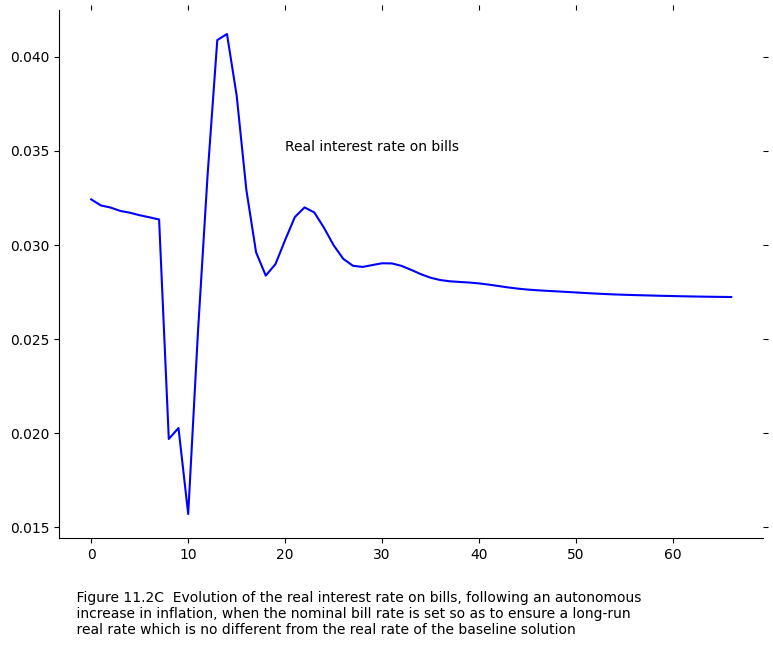

In [8]:
caption = '''
    Figure 11.2C  Evolution of the real interest rate on bills, following an autonomous
    increase in inflation, when the nominal bill rate is set so as to ensure a long-run
    real rate which is no different from the real rate of the baseline solution'''

data = [s['Rb'] - s['PI'] for s in omega0_rbbar.solutions[3:70]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
#axes.set_ylim(0.975, 1.034)

axes.plot(data, linestyle='-', color='b')

# add labels
plt.text(20, .035, 'Real interest rate on bills')
fig.text(0.1, -.1, caption);

###### Figure 11.2D

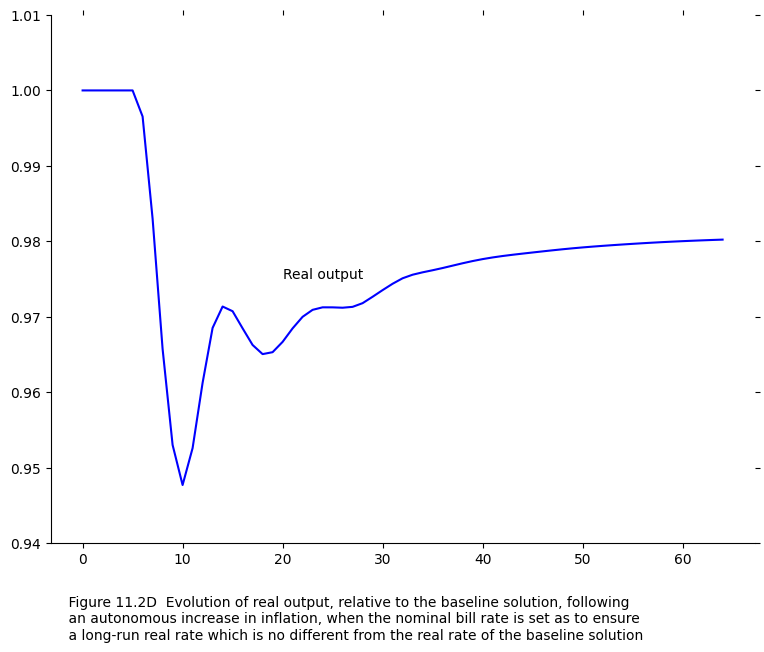

In [9]:
caption = '''
    Figure 11.2D  Evolution of real output, relative to the baseline solution, following
    an autonomous increase in inflation, when the nominal bill rate is set as to ensure
    a long-run real rate which is no different from the real rate of the baseline solution'''

data = list()
for i in range(5, 70):
    s = omega0_rbbar.solutions[i]
    base = baseline.solutions[i]
    data.append(s['Yk']/base['Yk'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.94, 1.01)

axes.plot(data, linestyle='-', color='b')

# add labels
plt.text(20, 0.975, 'Real output')
fig.text(0.1, -.1, caption);

### Scenario: Model GROWTH, an increase in the growth rate of government expenditure for one year

In [10]:
grg_one = create_growth_model()
grg_one.set_values(growth_parameters)
grg_one.set_values(growth_exogenous)
grg_one.set_values(growth_variables)

for _ in range(10):
    grg_one.solve(iterations=200, threshold=1e-6)

saved_grg = grg_one.parameters['GRg'].value
grg_one.set_values({'GRg': 0.035})

grg_one.solve(iterations=200, threshold=1e-6)

grg_one.set_values({'GRg': saved_grg})

for _ in range(89):
    grg_one.solve(iterations=200, threshold=1e-6)


###### Figure 11.3A

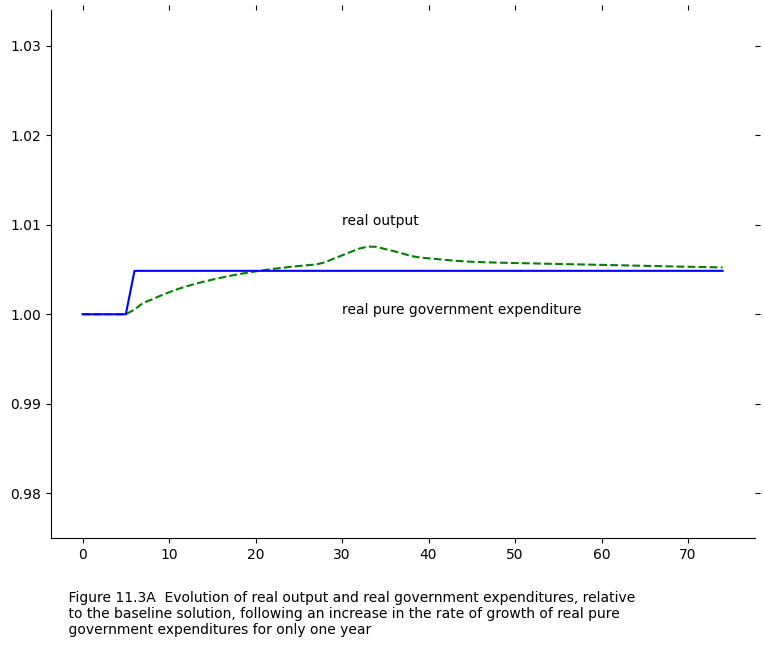

In [11]:
caption = '''
    Figure 11.3A  Evolution of real output and real government expenditures, relative
    to the baseline solution, following an increase in the rate of growth of real pure 
    government expenditures for only one year'''

ydata = list()
gdata = list()
for i in range(5, 80):
    s = grg_one.solutions[i]
    base = baseline.solutions[i]
    ydata.append(s['Yk']/base['Yk'])
    gdata.append(s['Gk']/base['Gk'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.975, 1.034)

axes.plot(ydata, linestyle='--', color='g')
axes.plot(gdata, linestyle='-', color='b')

# add labels
plt.text(30, 1.00, 'real pure government expenditure')
plt.text(30, 1.01, 'real output')
fig.text(0.1, -.1, caption);

###### Figure 11.3B

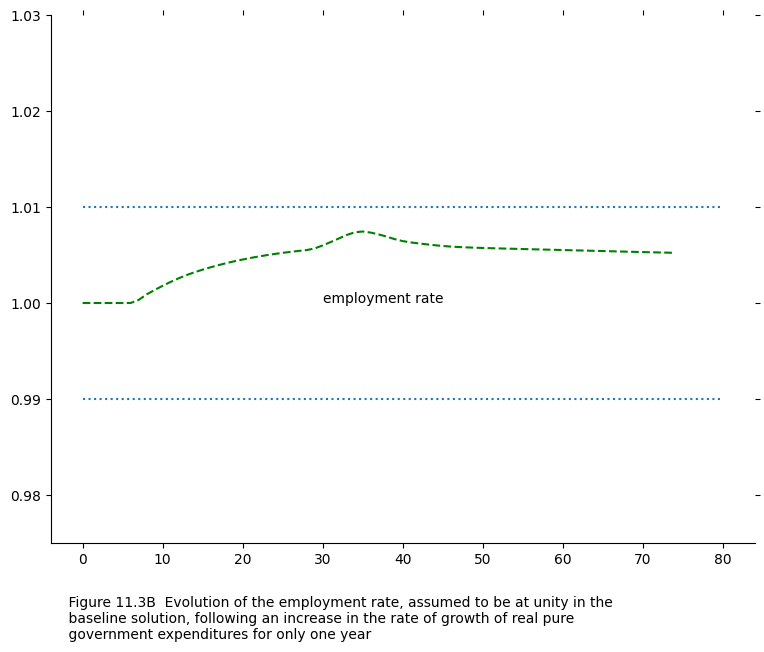

In [12]:
caption = '''
    Figure 11.3B  Evolution of the employment rate, assumed to be at unity in the
    baseline solution, following an increase in the rate of growth of real pure
    government expenditures for only one year'''

data = list()
for i in range(5, 80):
    s = grg_one.solutions[i]
    base = baseline.solutions[i]
    data.append(s['ER'] - base['ER'] + 1)

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.975, 1.03)
axes.plot(data, linestyle='--', color='g')

# add labels
plt.text(30, 1.00, 'employment rate')
plt.hlines(0.99, 0, 80, linestyle=':')
plt.hlines(1.01, 0, 80, linestyle=':')
fig.text(0.1, -.1, caption);

###### Figure 11.3C

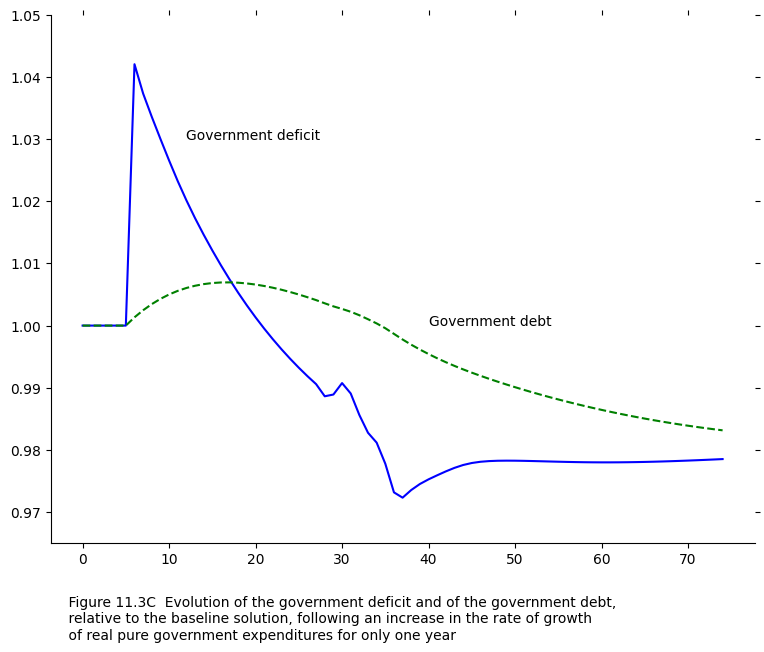

In [13]:
caption = '''
    Figure 11.3C  Evolution of the government deficit and of the government debt, 
    relative to the baseline solution, following an increase in the rate of growth
    of real pure government expenditures for only one year'''

psbrdata = list()
gdata = list()
for i in range(5, 80):
    s = grg_one.solutions[i]
    base = baseline.solutions[i]
    psbrdata.append(s['PSBR']/base['PSBR'])
    gdata.append(s['GD']/base['GD'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.965, 1.05)

axes.plot(psbrdata, linestyle='-', color='b')
axes.plot(gdata, linestyle='--', color='g')

# add labels
plt.text(12, 1.03, 'Government deficit')
plt.text(40, 1.0, 'Government debt')
fig.text(0.1, -.1, caption);

###### Figure 11.3D

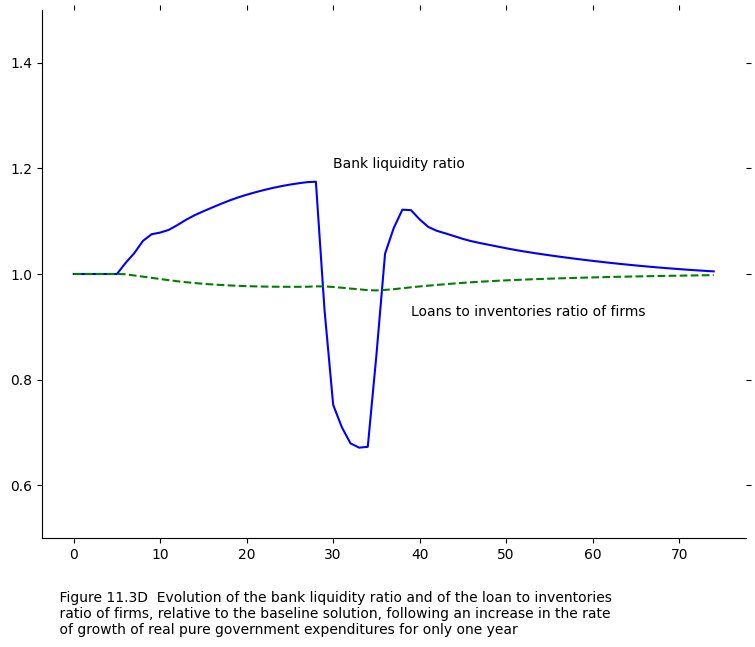

In [14]:
caption = '''
    Figure 11.3D  Evolution of the bank liquidity ratio and of the loan to inventories
    ratio of firms, relative to the baseline solution, following an increase in the rate
    of growth of real pure government expenditures for only one year'''

blrdata = list()
lidata = list()
for i in range(5, 80):
    s = grg_one.solutions[i]
    base = baseline.solutions[i]
    blrdata.append(s['BLR']/base['BLR'])
    lidata.append((s['Lfd']/s['IN'])/(base['Lfd']/base['IN']))

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.5, 1.5)

axes.plot(blrdata, linestyle='-', color='b')
axes.plot(lidata, linestyle='--', color='g')

# add labels
plt.text(30, 1.2, 'Bank liquidity ratio')
plt.text(39, 0.92, 'Loans to inventories ratio of firms')
fig.text(0.1, -.1, caption);

### Scenario: Model GROWTH, Decrease in the income tax rate

In [15]:
theta = create_growth_model()
theta.set_values(growth_parameters)
theta.set_values(growth_exogenous)
theta.set_values(growth_variables)

for _ in range(10):
    theta.solve(iterations=200, threshold=1e-6)

theta.set_values({'theta': 0.21844})

for _ in range(89):
    theta.solve(iterations=200, threshold=1e-6)


###### Figure 11.3E

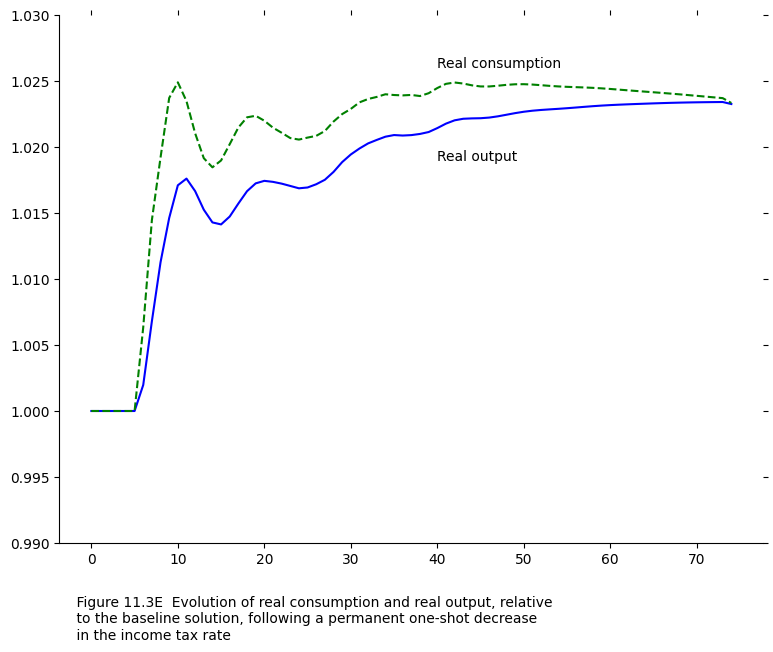

In [16]:
caption = '''
    Figure 11.3E  Evolution of real consumption and real output, relative
    to the baseline solution, following a permanent one-shot decrease
    in the income tax rate'''

ydata = list()
ckdata = list()
for i in range(5, 80):
    s = theta.solutions[i]
    base = baseline.solutions[i]
    ydata.append(s['Yk']/base['Yk'])
    ckdata.append(s['Ck']/base['Ck'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.99, 1.03)

axes.plot(ydata, linestyle='-', color='b')
axes.plot(ckdata, linestyle='--', color='g')

# add labels
plt.text(40, 1.019, 'Real output')
plt.text(40, 1.026, 'Real consumption')
fig.text(0.1, -.1, caption);

### Scenario: Model GROWTH, Permanent increase in the growth rate of government expenditure

In [17]:
grg = create_growth_model()
grg.set_values(growth_parameters)
grg.set_values(growth_exogenous)
grg.set_values(growth_variables)

for _ in range(10):
    grg.solve(iterations=200, threshold=1e-6)

grg.set_values({'GRg': 0.035})

for _ in range(90):
    grg.solve(iterations=200, threshold=1e-6)


###### Figure 11.4A

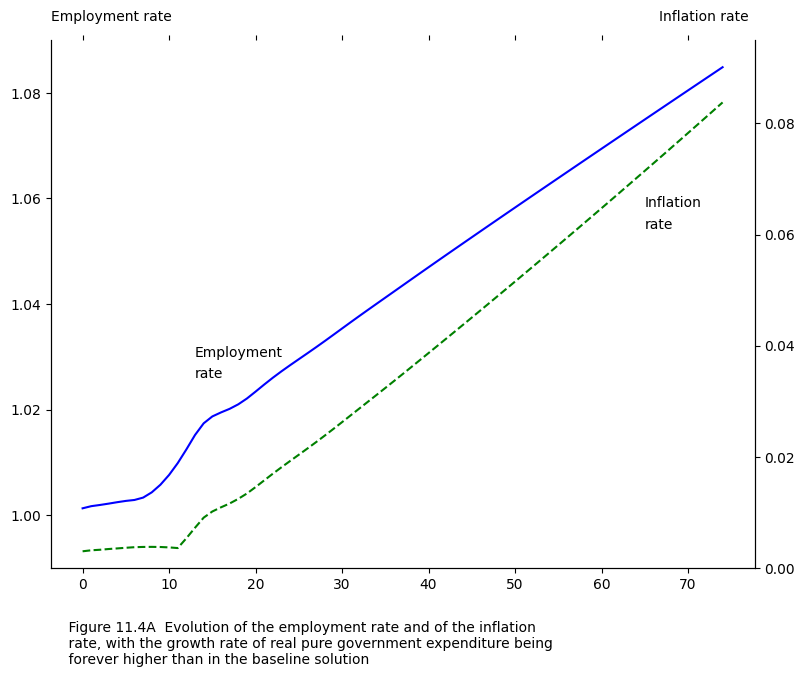

In [18]:
caption = '''
    Figure 11.4A  Evolution of the employment rate and of the inflation
    rate, with the growth rate of real pure government expenditure being
    forever higher than in the baseline solution'''

erdata = [s['ER'] for s in grg.solutions[5:80]]
pidata = [s['PI'] for s in grg.solutions[5:80]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.set_ylim(0.99, 1.09)
axes.plot(erdata, linestyle='-', color='b')

plt.text(13, 1.03, 'Employment')
plt.text(13, 1.026, 'rate')

axes2 = axes.twinx()
axes2.spines['top'].set_visible(False)
axes2.set_ylim(0, 0.095)
axes2.plot(pidata, linestyle='--', color='g')

plt.text(65, 0.065, 'Inflation')
plt.text(65, 0.061, 'rate')

# add labels
fig.text(0.1, 1.24, 'Employment rate')
fig.text(1.05, 1.24, 'Inflation rate')
fig.text(0.1, -.1, caption);

###### Figure 11.4B

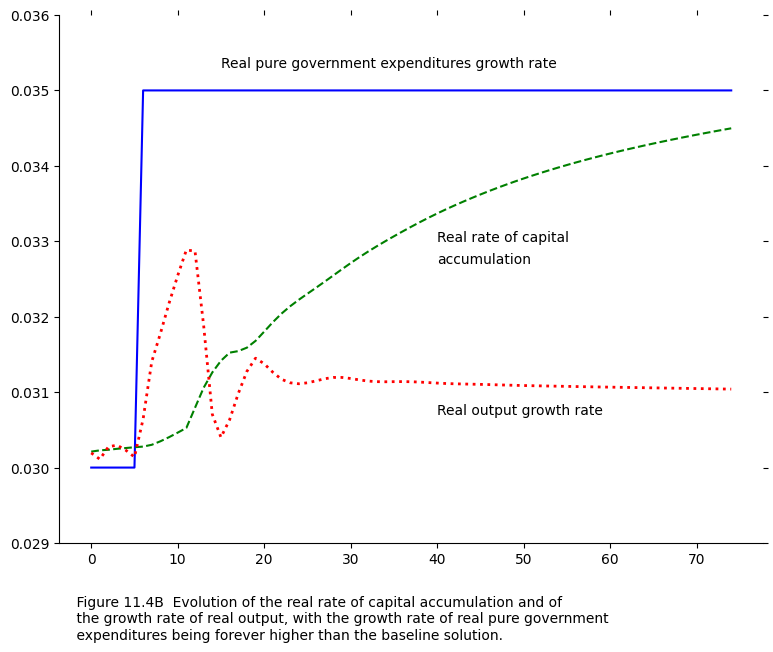

In [19]:
caption = '''
    Figure 11.4B  Evolution of the real rate of capital accumulation and of 
    the growth rate of real output, with the growth rate of real pure government 
    expenditures being forever higher than the baseline solution.'''

grgdata = list()
grkdata = list()
ykdata = list()
for i in range(5, 80):
    s = grg.solutions[i]
    s_1 = grg.solutions[i-1]

    grgdata.append(s['GRg'])
    grkdata.append(s['GRk'])
    ykdata.append((s['Yk']/s_1['Yk'])-1)

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.029, 0.036)

axes.plot(grgdata, linestyle='-', color='b')
axes.plot(grkdata, linestyle='--', color='g')
axes.plot(ykdata, linestyle=':', linewidth=2, color='r')

# add labels
plt.text(15, 0.0353, 'Real pure government expenditures growth rate')
plt.text(40, 0.033, 'Real rate of capital')
plt.text(40, 0.0327, 'accumulation')
plt.text(40, 0.0307, 'Real output growth rate')
fig.text(0.1, -.1, caption);

###### Figure 11.4C

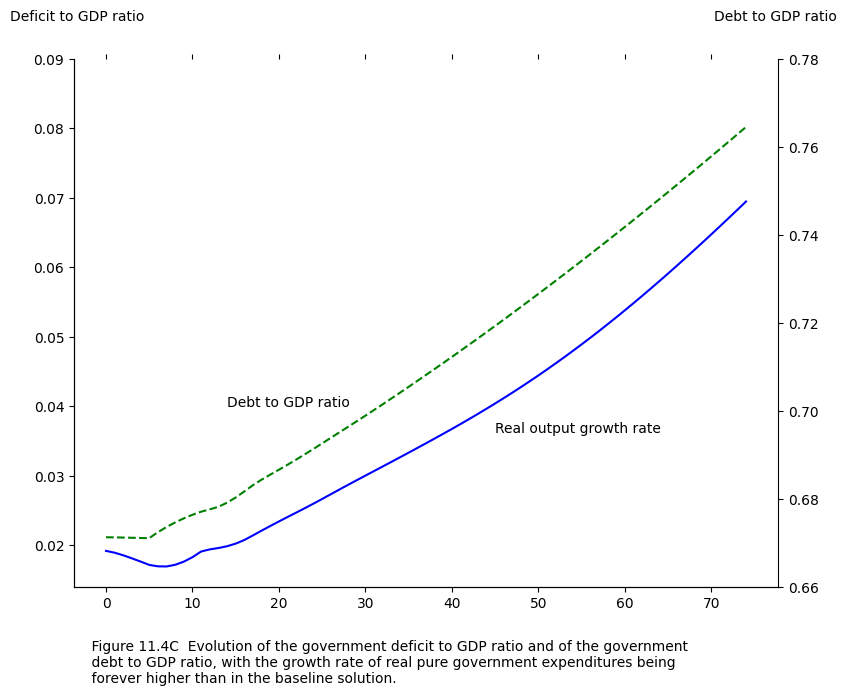

In [20]:
caption = '''
    Figure 11.4C  Evolution of the government deficit to GDP ratio and of the government
    debt to GDP ratio, with the growth rate of real pure government expenditures being
    forever higher than in the baseline solution.'''

gddata = [s['GD']/s['Y'] for s in grg.solutions[5:80]]
psbrdata = [s['PSBR']/s['Y'] for s in grg.solutions[5:80]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.014, 0.09)
axes.plot(psbrdata, linestyle='--', color='g')

plt.text(14, 0.04, 'Debt to GDP ratio')

axes2 = axes.twinx()
axes2.spines['top'].set_visible(False)
axes2.set_ylim(0.66, 0.78)
axes2.plot(gddata, linestyle='-', color='b')

plt.text(45, 0.695, 'Real output growth rate')

# add labels
fig.text(0, 1.28, 'Deficit to GDP ratio')
fig.text(1.1, 1.28, 'Debt to GDP ratio')
fig.text(0.1, -.1, caption);

### Scenario: Model GROWTH, an increase in four steps in the nominal interest rate on government bills

In [21]:
rbbar_step = create_growth_model()
rbbar_step.set_values(growth_parameters)
rbbar_step.set_values(growth_exogenous)
rbbar_step.set_values(growth_variables)

for _ in range(15):
    rbbar_step.solve(iterations=200, threshold=1e-6)

for rate_step in [0.0375, 0.04, 0.0425, 0.045]:
    rbbar_step.set_values({'Rbbar': rate_step})
    for _ in range(2):
        rbbar_step.solve(iterations=200, threshold=1e-6)

for _ in range(77):
    rbbar_step.solve(iterations=200, threshold=1e-6)


###### Figure 11.5A

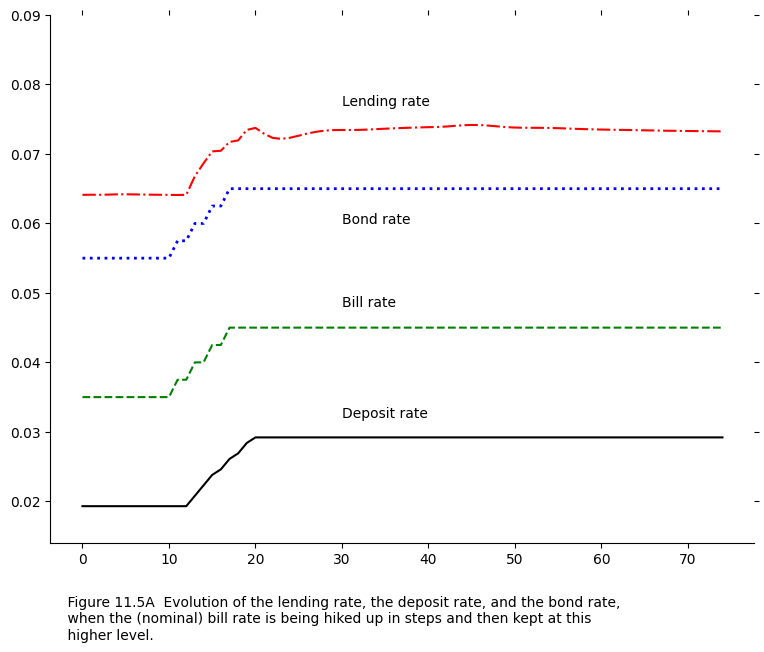

In [22]:
caption = '''
    Figure 11.5A  Evolution of the lending rate, the deposit rate, and the bond rate,
    when the (nominal) bill rate is being hiked up in steps and then kept at this
    higher level.'''

rmdata = [s['Rm'] for s in rbbar_step.solutions[5:80]]
rbdata = [s['Rb'] for s in rbbar_step.solutions[5:80]]
rbldata = [s['Rbl'] for s in rbbar_step.solutions[5:80]]
rldata = [s['Rl'] for s in rbbar_step.solutions[5:80]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.014, 0.09)

axes.plot(rmdata, linestyle='-', color='k')
axes.plot(rbdata, linestyle='--', color='g')
axes.plot(rbldata, linestyle=':', linewidth=2, color='b')
axes.plot(rldata, linestyle='-.', color='r')

# add labels
plt.text(30, 0.032, 'Deposit rate')
plt.text(30, 0.048, 'Bill rate')
plt.text(30, 0.06, 'Bond rate')
plt.text(30, 0.077, 'Lending rate')
fig.text(0.1, -.1, caption);

###### Figure 11.5B

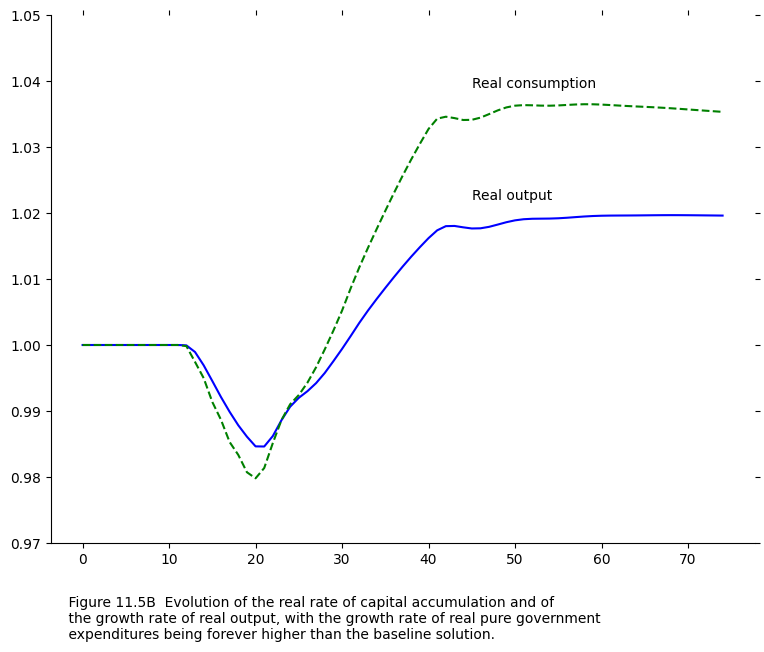

In [23]:
caption = '''
    Figure 11.5B  Evolution of the real rate of capital accumulation and of 
    the growth rate of real output, with the growth rate of real pure government 
    expenditures being forever higher than the baseline solution.'''

ykdata = list()
ckdata = list()
for i in range(5, 80):
    s = rbbar_step.solutions[i]
    base = baseline.solutions[i]

    ykdata.append(s['Yk']/base['Yk'])
    ckdata.append(s['Ck']/base['Ck'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.97, 1.05)

axes.plot(ykdata, linestyle='-', color='b')
axes.plot(ckdata, linestyle='--', color='g')

# add labels
plt.text(45, 1.022, 'Real output')
plt.text(45, 1.039, 'Real consumption')

fig.text(0.1, -.1, caption);

###### Figure 11.5C

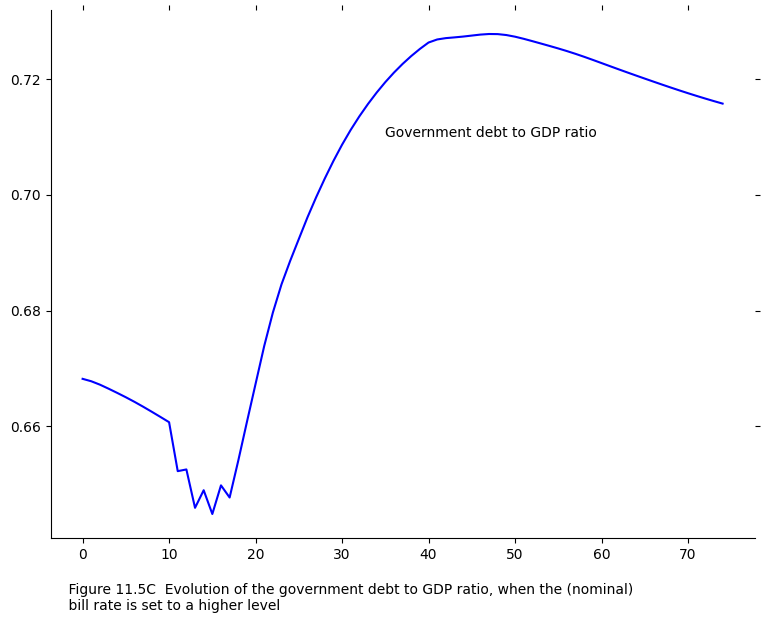

In [24]:
caption = '''
    Figure 11.5C  Evolution of the government debt to GDP ratio, when the (nominal)
    bill rate is set to a higher level'''

gddata = [s['GD']/s['Y'] for s in rbbar_step.solutions[5:80]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(gddata, linestyle='-', color='b')

# add labels
plt.text(35, 0.71, 'Government debt to GDP ratio')
fig.text(0.1, -.05, caption);

###### Figure 11.5D

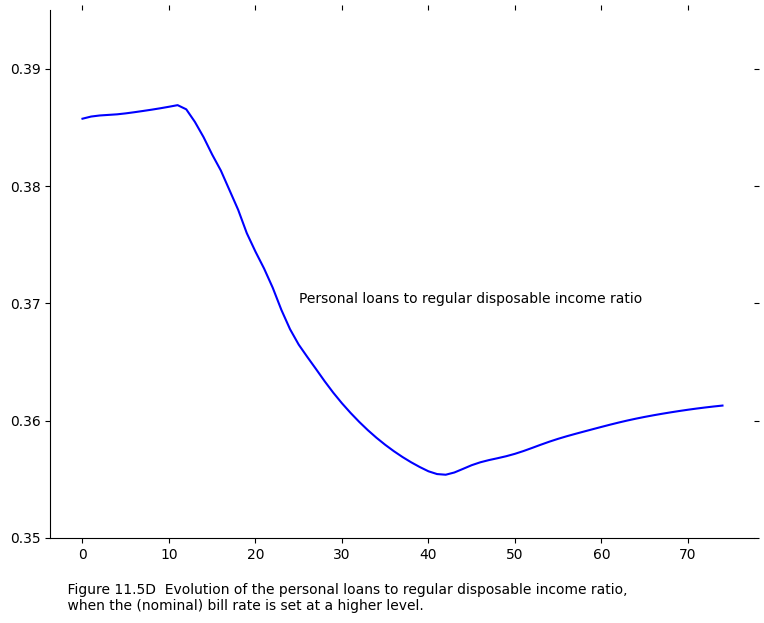

In [25]:
caption = '''
    Figure 11.5D  Evolution of the personal loans to regular disposable income ratio,
    when the (nominal) bill rate is set at a higher level.'''

data = [s['Lhs']/s['YDr'] for s in rbbar_step.solutions[5:80]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.35, 0.395)
axes.plot(data, linestyle='-', color='b')

# add labels
plt.text(25, 0.37, 'Personal loans to regular disposable income ratio')
fig.text(0.1, -.05, caption);

###### Figure 11.5E

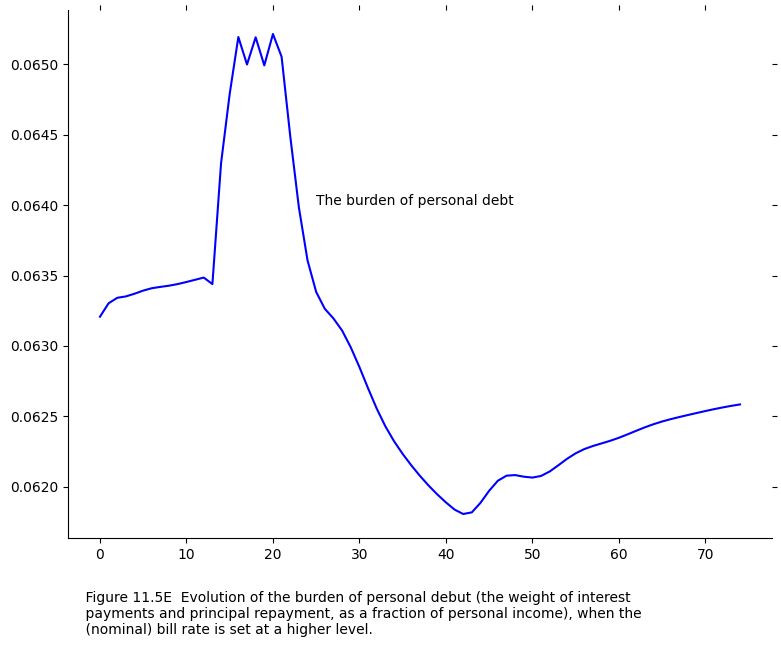

In [26]:
caption = '''
    Figure 11.5E  Evolution of the burden of personal debut (the weight of interest
    payments and principal repayment, as a fraction of personal income), when the
    (nominal) bill rate is set at a higher level.'''

data = [s['BUR'] for s in rbbar_step.solutions[5:80]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.plot(data, linestyle='-', color='b')

# add labels
plt.text(25, 0.064, 'The burden of personal debt')
fig.text(0.1, -.1, caption);

### Scenario: Model GROWTH, Increase in the rate of growth in government expenditures

In [27]:
alpha1 = create_growth_model()
alpha1.set_values(growth_parameters)
alpha1.set_values(growth_exogenous)
alpha1.set_values(growth_variables)

for _ in range(10):
    alpha1.solve(iterations=200, threshold=1e-6)

alpha1.set_values({'alpha1': 0.8})

for _ in range(90):
    alpha1.solve(iterations=200, threshold=1e-6)


###### Figure 11.7A

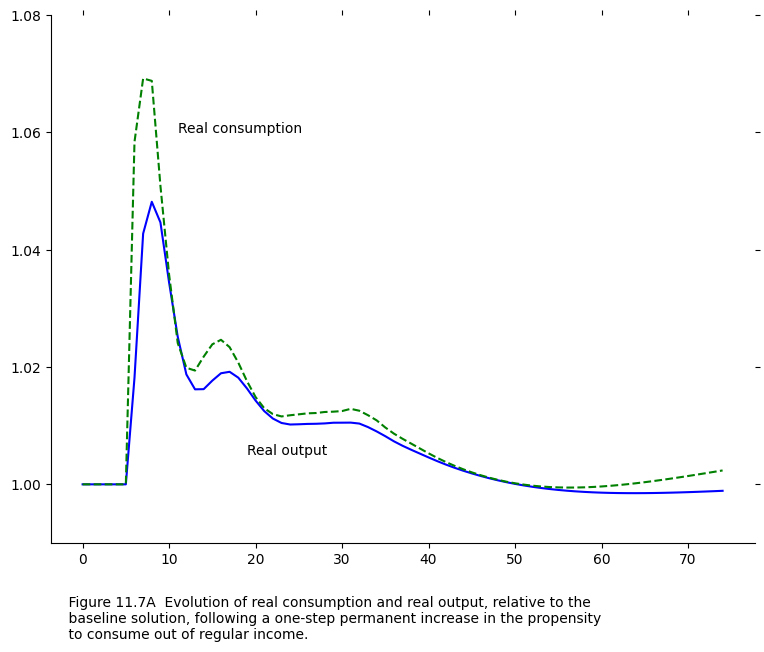

In [28]:
caption = '''
    Figure 11.7A  Evolution of real consumption and real output, relative to the
    baseline solution, following a one-step permanent increase in the propensity
    to consume out of regular income.'''

ykdata = list()
ckdata = list()
for i in range(5, 80):
    s = alpha1.solutions[i]
    base = baseline.solutions[i]

    ykdata.append(s['Yk']/base['Yk'])
    ckdata.append(s['Ck']/base['Ck'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.99, 1.08)

axes.plot(ykdata, linestyle='-', color='b')
axes.plot(ckdata, linestyle='--', color='g')

# add labels
plt.text(19, 1.005, 'Real output')
plt.text(11, 1.06, 'Real consumption')

fig.text(0.1, -.1, caption);

###### Figure 11.7B

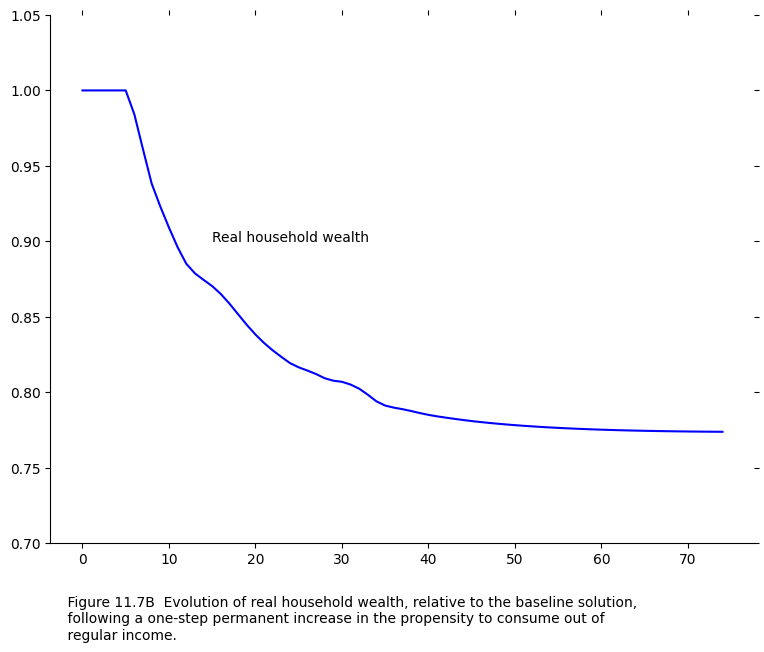

In [29]:
caption = '''
    Figure 11.7B  Evolution of real household wealth, relative to the baseline solution,
    following a one-step permanent increase in the propensity to consume out of
    regular income.'''

data = list()
for i in range(5, 80):
    s = alpha1.solutions[i]
    base = baseline.solutions[i]

    data.append(s['Vk']/base['Vk'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.7, 1.05)

axes.plot(data, linestyle='-', color='b')

# add labels
plt.text(15, 0.9, 'Real household wealth')

fig.text(0.1, -.1, caption);

###### Figure 11.7C

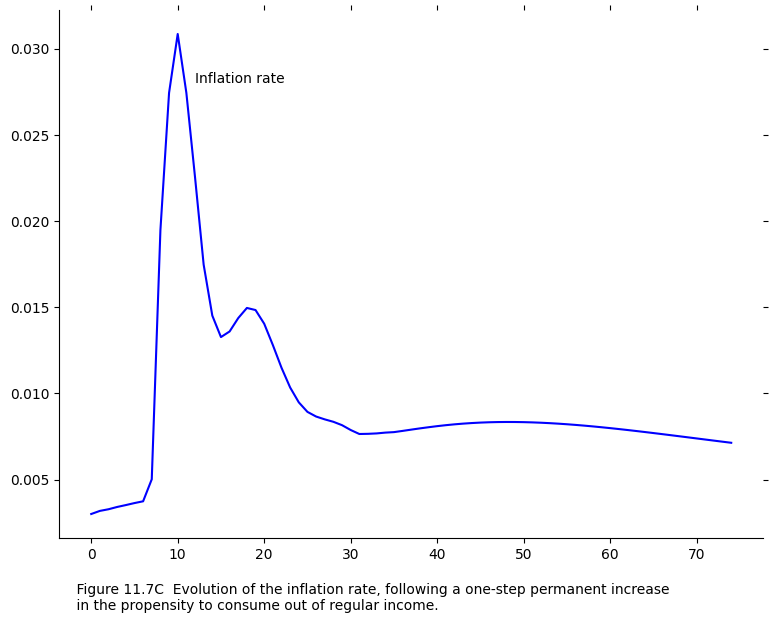

In [30]:
caption = '''
    Figure 11.7C  Evolution of the inflation rate, following a one-step permanent increase
    in the propensity to consume out of regular income.'''

data = [s['PI'] for s in alpha1.solutions[5:80]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.plot(data, linestyle='-', color='b')

# add labels
plt.text(12, 0.028, 'Inflation rate')
fig.text(0.1, -.05, caption);

###### Figure 11.7D

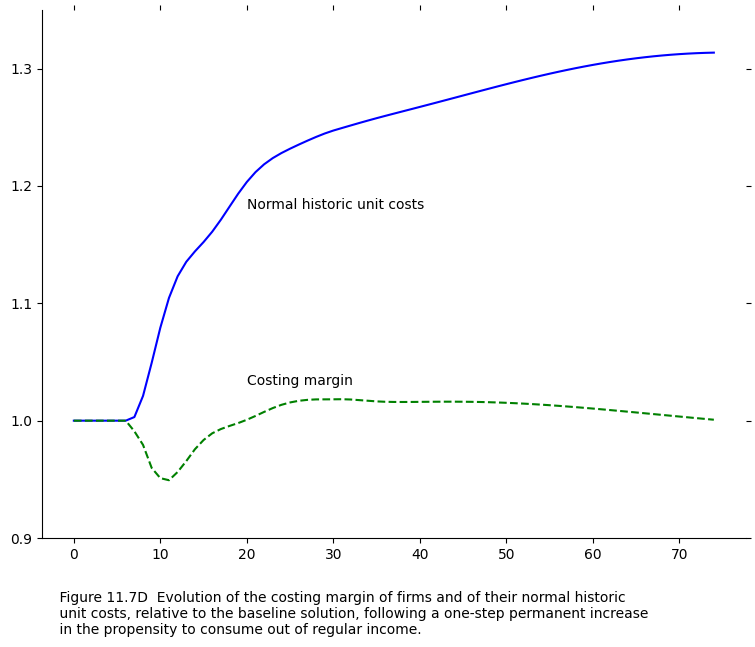

In [31]:
caption = '''
    Figure 11.7D  Evolution of the costing margin of firms and of their normal historic
    unit costs, relative to the baseline solution, following a one-step permanent increase
    in the propensity to consume out of regular income.'''

nhucdata = list()
phidata = list()
for i in range(5, 80):
    s = alpha1.solutions[i]
    base = baseline.solutions[i]

    nhucdata.append(s['NHUC']/base['NHUC'])
    phidata.append(s['phi']/base['phi'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.9, 1.35)

axes.plot(nhucdata, linestyle='-', color='b')
axes.plot(phidata, linestyle='--', color='g')

# add labels
plt.text(20, 1.18, 'Normal historic unit costs')
plt.text(20, 1.03, 'Costing margin')
fig.text(0.1, -.1, caption);

###### Figure 11.7E

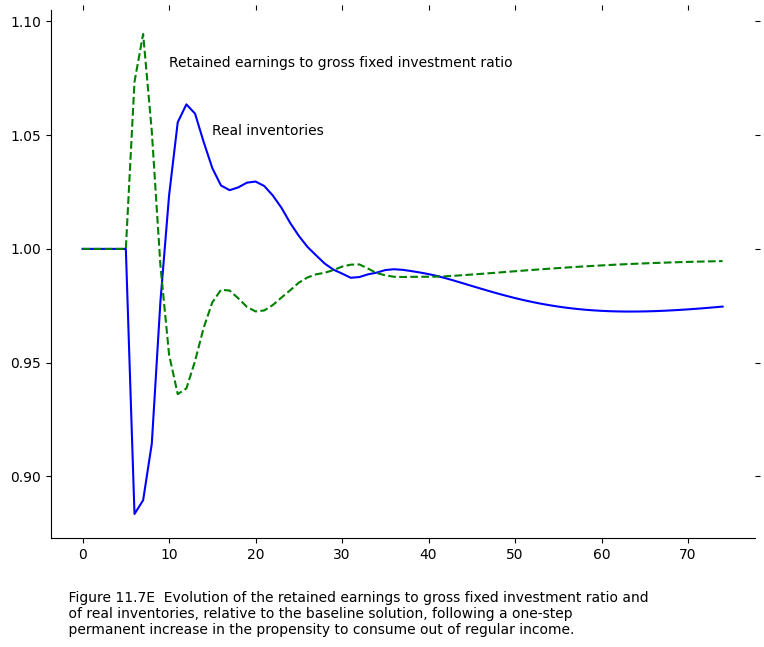

In [32]:
caption = '''
    Figure 11.7E  Evolution of the retained earnings to gross fixed investment ratio and
    of real inventories, relative to the baseline solution, following a one-step
    permanent increase in the propensity to consume out of regular income.'''

indata = list()
fudata = list()
for i in range(5, 80):
    s = alpha1.solutions[i]
    base = baseline.solutions[i]

    indata.append(s['INk']/base['INk'])
    fudata.append((s['FUf']/s['INV']) / (base['FUf']/base['INV']))

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
#axes.set_ylim(0.9, 1.35)

axes.plot(indata, linestyle='-', color='b')
axes.plot(fudata, linestyle='--', color='g')

# add labels
plt.text(15, 1.05, 'Real inventories')
plt.text(10, 1.08, 'Retained earnings to gross fixed investment ratio')
fig.text(0.1, -.1, caption);

###### Figure 11.7F

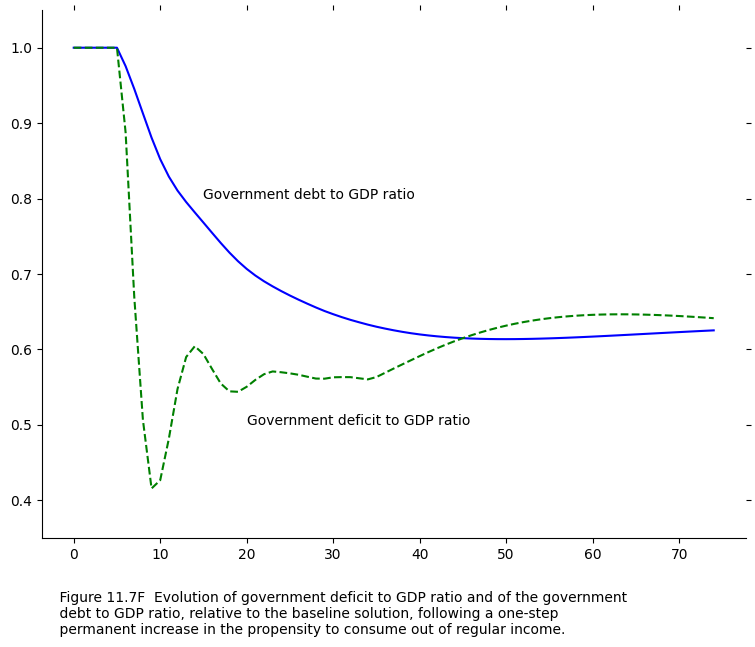

In [33]:
caption = '''
    Figure 11.7F  Evolution of government deficit to GDP ratio and of the government
    debt to GDP ratio, relative to the baseline solution, following a one-step
    permanent increase in the propensity to consume out of regular income.'''

gddata = list()
psbrdata = list()
for i in range(5, 80):
    s = alpha1.solutions[i]
    base = baseline.solutions[i]

    gddata.append((s['GD']/s['Y'])/(base['GD']/base['Y']))
    psbrdata.append((s['PSBR']/s['Y'])/(base['PSBR']/base['Y']))
    
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.35, 1.05)

axes.plot(gddata, linestyle='-', color='b')
axes.plot(psbrdata, linestyle='--', color='g')

# add labels
plt.text(15, 0.8, 'Government debt to GDP ratio')
plt.text(20, .5, 'Government deficit to GDP ratio')
fig.text(0.1, -.1, caption);

###### Figure 11.7G

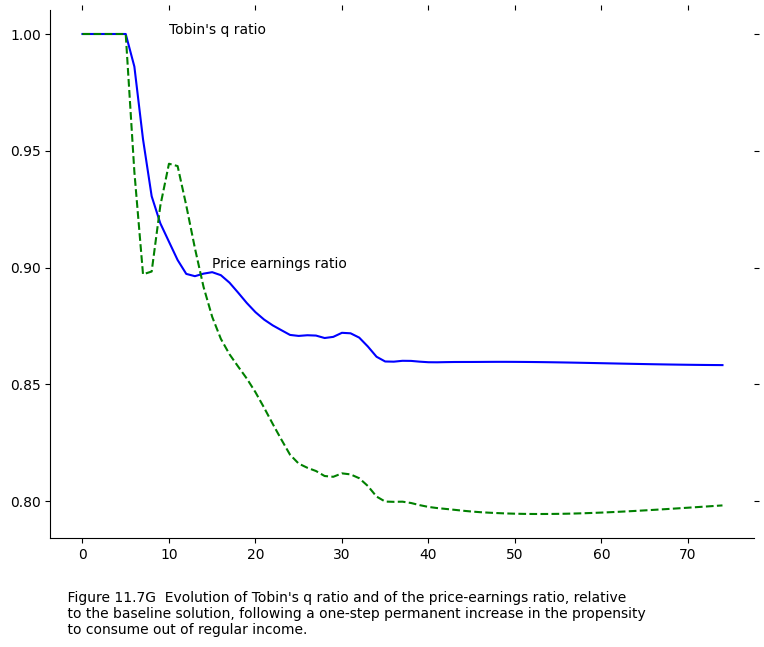

In [34]:
caption = '''
    Figure 11.7G  Evolution of Tobin's q ratio and of the price-earnings ratio, relative
    to the baseline solution, following a one-step permanent increase in the propensity
    to consume out of regular income.'''

qdata = list()
pedata = list()
for i in range(5, 80):
    s = alpha1.solutions[i]
    base = baseline.solutions[i]

    qdata.append(s['Q']/base['Q'])
    pedata.append(s['PE']/base['PE'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(qdata, linestyle='-', color='b')
axes.plot(pedata, linestyle='--', color='g')

# add labels
plt.text(10, 1, "Tobin's q ratio")
plt.text(15, .9, 'Price earnings ratio')
fig.text(0.1, -.1, caption);

### Scenario: Model GROWTH, an increase in the ratio of new loans to personal income

In [35]:
eta0 = create_growth_model()
eta0.set_values(growth_parameters)
eta0.set_values(growth_exogenous)
eta0.set_values(growth_variables)

for _ in range(10):
    eta0.solve(iterations=200, threshold=1e-6)

eta0.set_values({'eta0': 0.08416})
    
for _ in range(90):
    eta0.solve(iterations=200, threshold=1e-6)
    

###### Figure 11.8A

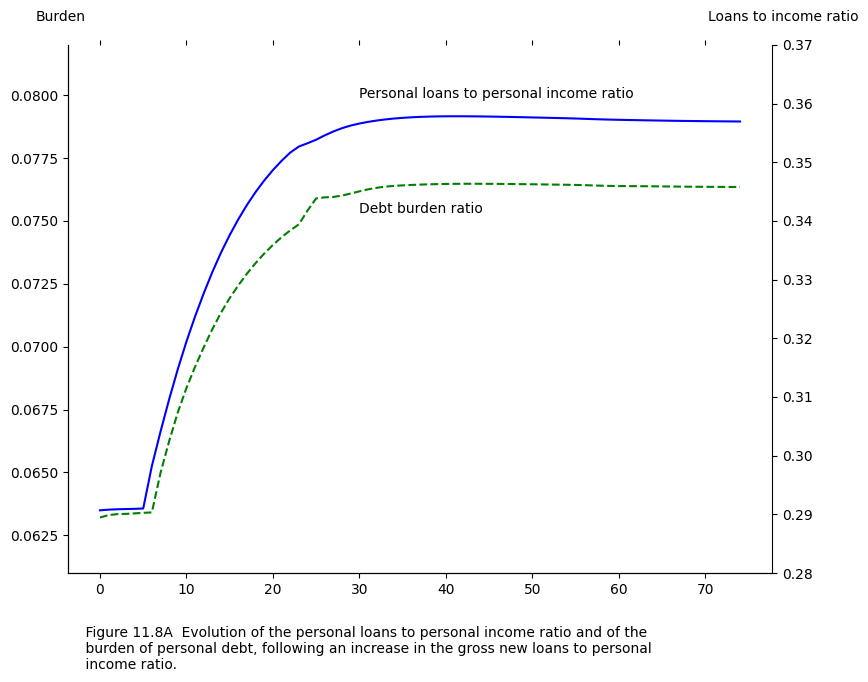

In [36]:
caption = '''
    Figure 11.8A  Evolution of the personal loans to personal income ratio and of the
    burden of personal debt, following an increase in the gross new loans to personal
    income ratio.'''

data = list()
burdata = list()
for i in range(5, 80):
    s = eta0.solutions[i]
    base = baseline.solutions[i]

    data.append((s['Lhd']/s['YP']))
    burdata.append(s['BUR'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.061, 0.082)

axes.plot(burdata, linestyle='--', color='g')
plt.text(30, 0.0753, 'Debt burden ratio')

axes2 = axes.twinx()
axes2.spines['top'].set_visible(False)
axes2.set_ylim(0.28, 0.37)

axes2.plot(data, linestyle='-', color='b')
plt.text(30, 0.361, 'Personal loans to personal income ratio')

# add labels
fig.text(0.05, 1.25, 'Burden')
fig.text(1.1, 1.25, 'Loans to income ratio')
fig.text(0.1, -.1, caption);

###### Figure 11.8B

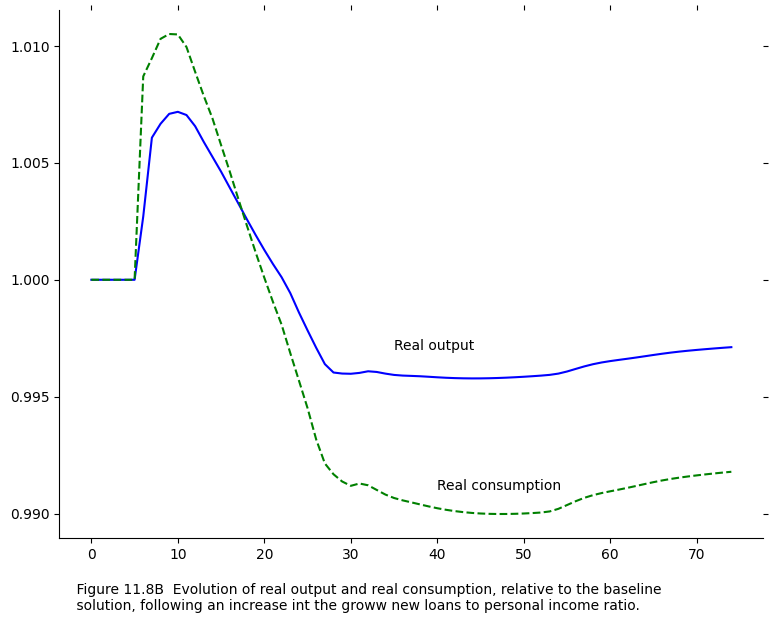

In [37]:
caption = '''
    Figure 11.8B  Evolution of real output and real consumption, relative to the baseline
    solution, following an increase int the groww new loans to personal income ratio.'''

ykdata = list()
ckdata = list()
for i in range(5, 80):
    s = eta0.solutions[i]
    base = baseline.solutions[i]

    ykdata.append(s['Yk']/base['Yk'])
    ckdata.append(s['Ck']/base['Ck'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(ykdata, linestyle='-', color='b')
axes.plot(ckdata, linestyle='--', color='g')

# add labels
plt.text(35, 0.997, 'Real output')
plt.text(40, 0.991, 'Real consumption')
fig.text(0.1, -.05, caption);

###### Figure 11.8C

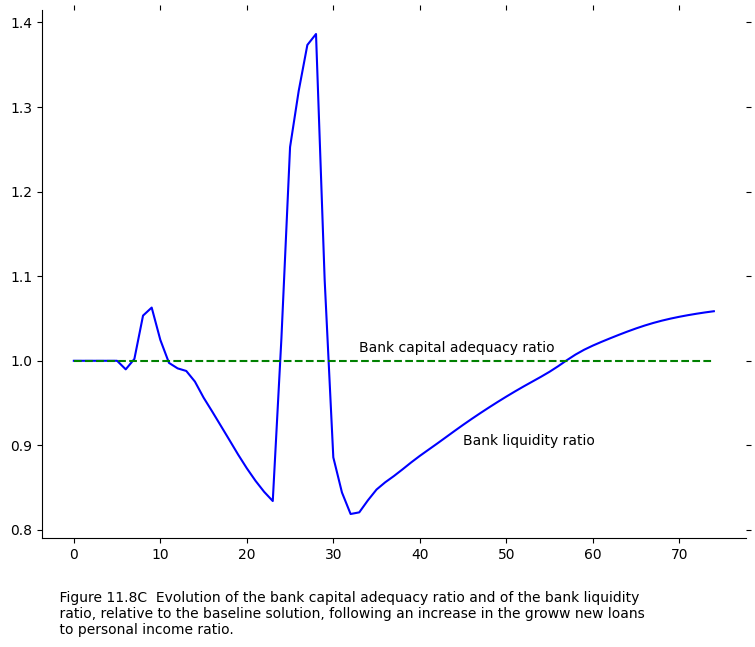

In [38]:
caption = '''
    Figure 11.8C  Evolution of the bank capital adequacy ratio and of the bank liquidity
    ratio, relative to the baseline solution, following an increase in the groww new loans
    to personal income ratio.'''

blrdata = list()
cardata = list()
for i in range(5, 80):
    s = eta0.solutions[i]
    base = baseline.solutions[i]

    blrdata.append(s['BLR']/base['BLR'])
    cardata.append(base['CAR']/base['CAR'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(blrdata, linestyle='-', color='b')
axes.plot(cardata, linestyle='--', color='g')

# add labels
plt.text(45, 0.9, 'Bank liquidity ratio')
plt.text(33, 1.01, 'Bank capital adequacy ratio')
fig.text(0.1, -.1, caption);

###### Figure 11.8D

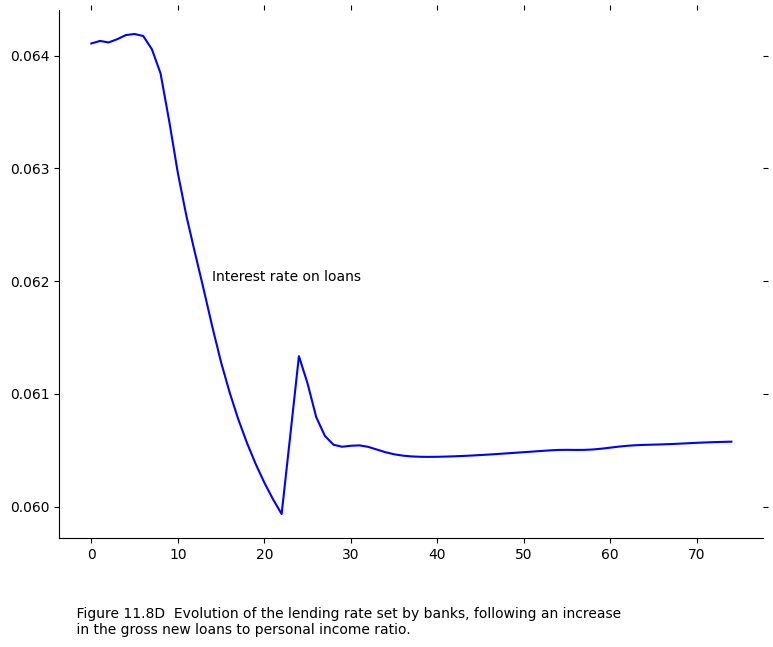

In [39]:
caption = '''
    Figure 11.8D  Evolution of the lending rate set by banks, following an increase
    in the gross new loans to personal income ratio.'''

data = [s['Rl'] for s in eta0.solutions[5:80]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(data, linestyle='-', color='b')

# add labels
plt.text(14, 0.062, 'Interest rate on loans')
fig.text(0.1, -.1, caption);

###### Figure 11.8E

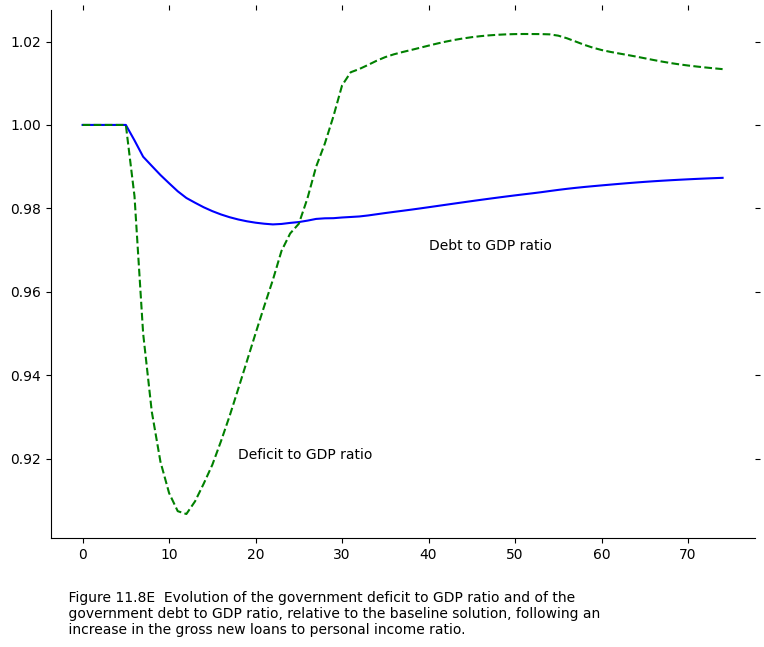

In [40]:
caption = '''
    Figure 11.8E  Evolution of the government deficit to GDP ratio and of the 
    government debt to GDP ratio, relative to the baseline solution, following an
    increase in the gross new loans to personal income ratio.'''

gddata = list()
psbrdata = list()
for i in range(5, 80):
    s = eta0.solutions[i]
    base = baseline.solutions[i]

    gddata.append((s['GD']/s['Y'])/(base['GD']/base['Y']))
    psbrdata.append((s['PSBR']/s['Y'])/(base['PSBR']/base['Y']))

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(gddata, linestyle='-', color='b')
axes.plot(psbrdata, linestyle='--', color='g')

# add labels
plt.text(40, 0.97, 'Debt to GDP ratio')
plt.text(18, 0.92, 'Deficit to GDP ratio')
fig.text(0.1, -.1, caption);

### Scenario: Model GROWTH, an increase in the desire to hold equities, offset by a drop in the desire to hold deposits

In [41]:
lambda40 = create_growth_model()
lambda40.set_values(growth_parameters)
lambda40.set_values(growth_exogenous)
lambda40.set_values(growth_variables)

for _ in range(10):
    lambda40.solve(iterations=200, threshold=1e-6)

lambda40.set_values({'lambda40': 0.77132})

for _ in range(90):
    lambda40.solve(iterations=200, threshold=1e-6)


###### Figure 11.9A

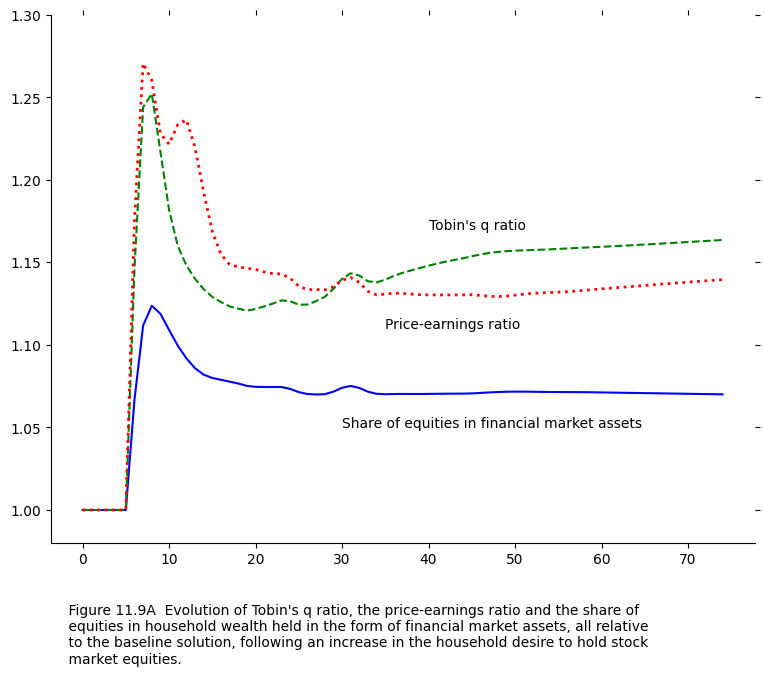

In [42]:
caption = '''
    Figure 11.9A  Evolution of Tobin's q ratio, the price-earnings ratio and the share of
    equities in household wealth held in the form of financial market assets, all relative
    to the baseline solution, following an increase in the household desire to hold stock
    market equities.'''

eqdata = list()
qdata = list()
pedata = list()
for i in range(5, 80):
    s = lambda40.solutions[i]
    base = baseline.solutions[i]

    eqdata.append((s['Pe']*s['Ekd']/s['Vfma'])/(base['Pe']*base['Ekd']/base['Vfma']))
    qdata.append(s['Q']/base['Q'])
    pedata.append(s['PE']/base['PE'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.98, 1.3)

axes.plot(eqdata, linestyle='-', color='b')
axes.plot(qdata, linestyle='--', color='g')
axes.plot(pedata, linestyle=':', linewidth=2, color='r')

# add labels
plt.text(30, 1.05, 'Share of equities in financial market assets')
plt.text(40, 1.17, "Tobin's q ratio")
plt.text(35, 1.11, 'Price-earnings ratio')
fig.text(0.1, -.15, caption);

###### Figure 11.9B

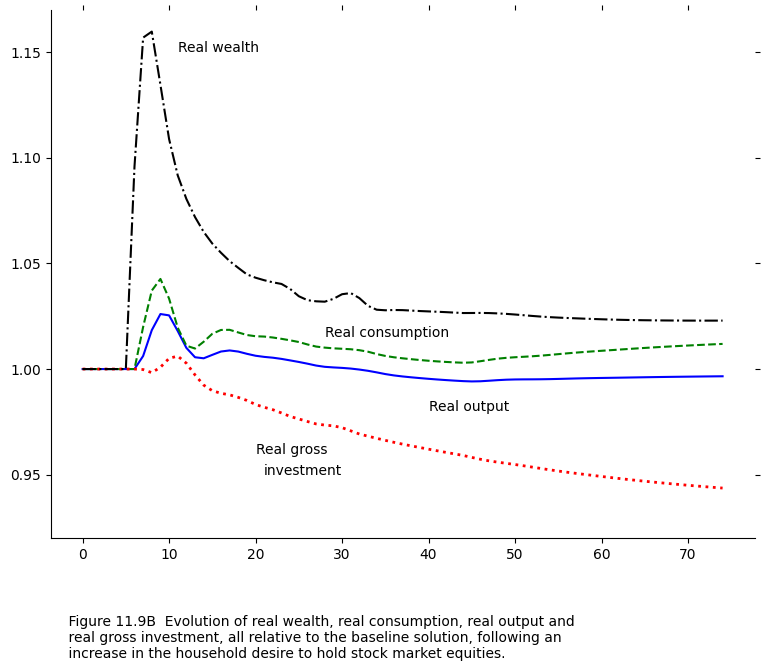

In [43]:
caption = '''
    Figure 11.9B  Evolution of real wealth, real consumption, real output and
    real gross investment, all relative to the baseline solution, following an
    increase in the household desire to hold stock market equities.'''

ykdata = list()
ckdata = list()
ikdata = list()
vkdata = list()
for i in range(5, 80):
    s = lambda40.solutions[i]
    base = baseline.solutions[i]

    ykdata.append(s['Yk']/base['Yk'])
    ckdata.append(s['Ck']/base['Ck'])
    ikdata.append(s['Ik']/base['Ik'])
    vkdata.append(s['Vk']/base['Vk'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.92, 1.17)

axes.plot(ykdata, linestyle='-', color='b')
axes.plot(ckdata, linestyle='--', color='g')
axes.plot(ikdata, linestyle=':', linewidth=2, color='r')
axes.plot(vkdata, linestyle='-.', color='k')

# add labels
plt.text(40, 0.98, 'Real output')
plt.text(28, 1.015, 'Real consumption')
plt.text(20, 0.96, 'Real gross')
plt.text(21, 0.95, 'investment')
plt.text(11, 1.15, 'Real wealth')
fig.text(0.1, -.15, caption);

###### Figure 11.9C

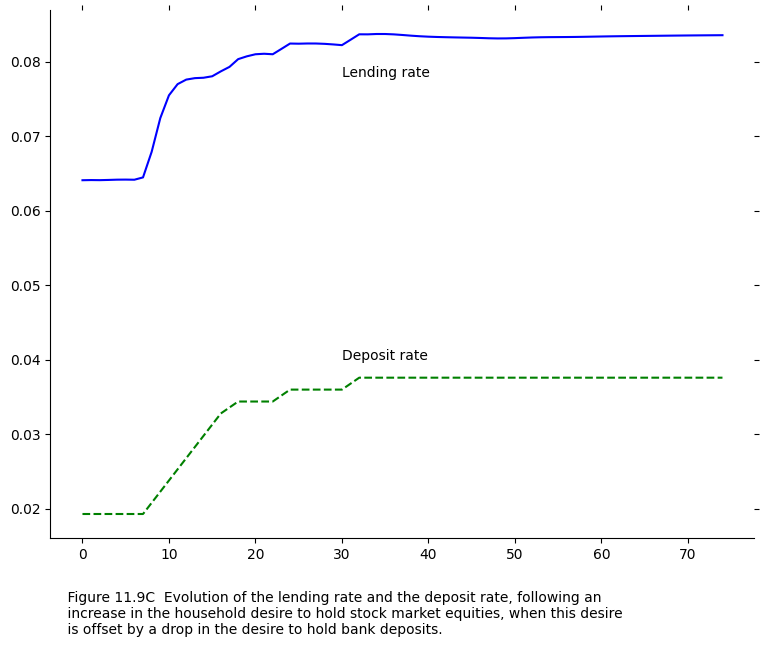

In [44]:
caption = '''
    Figure 11.9C  Evolution of the lending rate and the deposit rate, following an
    increase in the household desire to hold stock market equities, when this desire
    is offset by a drop in the desire to hold bank deposits.'''

rldata = [s['Rl'] for s in lambda40.solutions[5:80]]
rmdata = [s['Rm'] for s in lambda40.solutions[5:80]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(rldata, linestyle='-', color='b')
axes.plot(rmdata, linestyle='--', color='g')

# add labels
plt.text(30, 0.078, 'Lending rate')
plt.text(30, 0.04, 'Deposit rate')
fig.text(0.1, -.1, caption);

### Scenario: Model GROWTH, an increase in the desire to hold equities, offset by a drop in the desire to hold bills and bonds

In [45]:
lambdax0 = create_growth_model()
lambdax0.set_values(growth_parameters)
lambdax0.set_values(growth_exogenous)
lambdax0.set_values(growth_variables)

for _ in range(10):
    lambdax0.solve(iterations=200, threshold=1e-6)

lambdax0.set_values({'lambda20': 0.20,
                     'lambda30': -0.04341 - 0.05,
                     'lambda40': 0.77132})

for _ in range(90):
    lambdax0.solve(iterations=200, threshold=1e-6)


###### Figure 11.9D

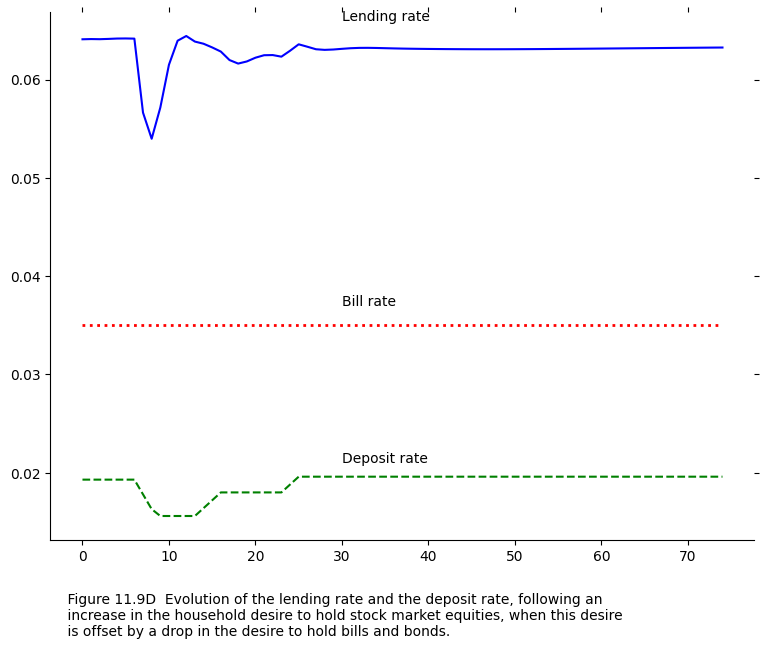

In [46]:
caption = '''
    Figure 11.9D  Evolution of the lending rate and the deposit rate, following an
    increase in the household desire to hold stock market equities, when this desire
    is offset by a drop in the desire to hold bills and bonds.'''

rldata = [s['Rl'] for s in lambdax0.solutions[5:80]]
rmdata = [s['Rm'] for s in lambdax0.solutions[5:80]]
rbdata = [s['Rb'] for s in lambdax0.solutions[5:80]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(rldata, linestyle='-', color='b')
axes.plot(rmdata, linestyle='--', color='g')
axes.plot(rbdata, linestyle=':', linewidth=2, color='r')

# add labels
plt.text(30, 0.066, 'Lending rate')
plt.text(30, 0.021, 'Deposit rate')
plt.text(30, 0.037, 'Bill rate')
fig.text(0.1, -.1, caption);

### Scenario: Model GROWTH, an increase in the target proportion of gross investment financed by retained earnings

In [47]:
psiu = create_growth_model()
psiu.set_values(growth_parameters)
psiu.set_values(growth_exogenous)
psiu.set_values(growth_variables)

for _ in range(10):
    psiu.solve(iterations=200, threshold=1e-6)

psiu.set_values({'psiu': 1})

for _ in range(90):
    psiu.solve(iterations=200, threshold=1e-6)


###### Figure 11.10A

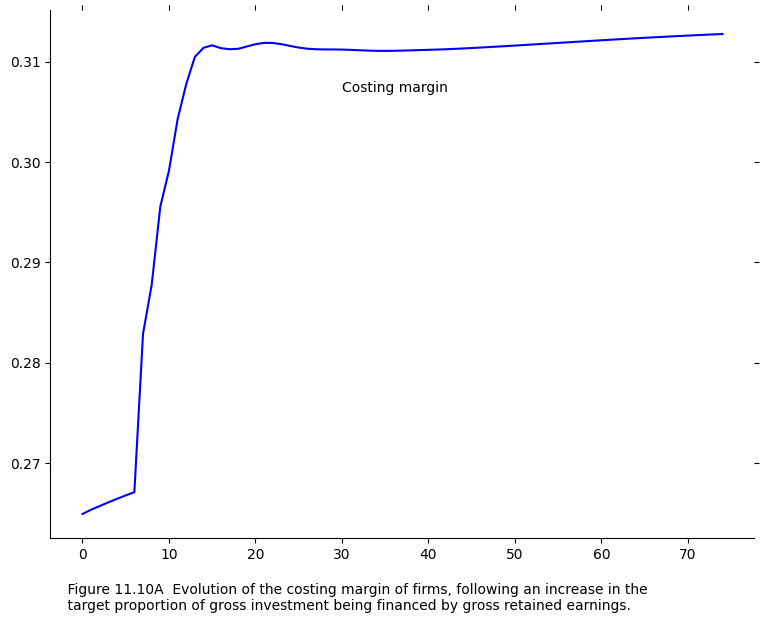

In [48]:
caption = '''
    Figure 11.10A  Evolution of the costing margin of firms, following an increase in the
    target proportion of gross investment being financed by gross retained earnings.'''

data = [s['phi'] for s in psiu.solutions[5:80]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(data, linestyle='-', color='b')

# add labels
plt.text(30, 0.307, 'Costing margin')
fig.text(0.1, -.05, caption);

###### Figure 11.10B

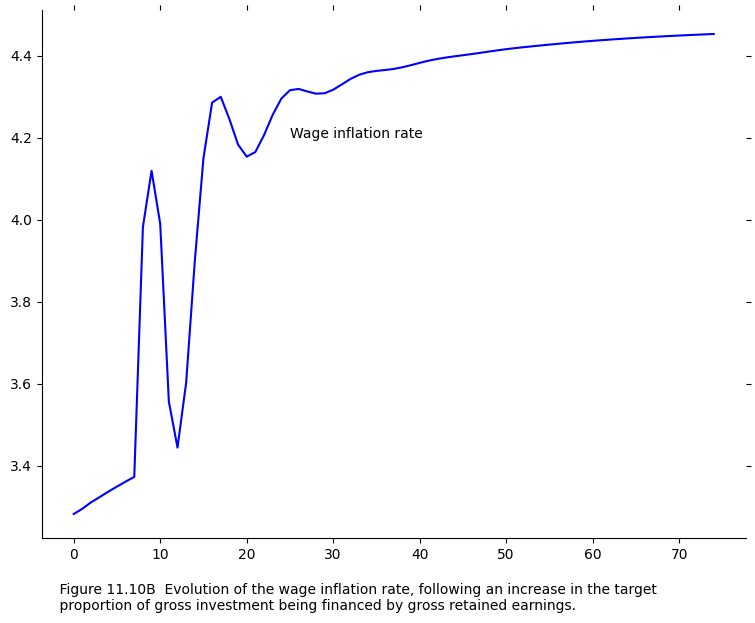

In [49]:
caption = '''
    Figure 11.10B  Evolution of the wage inflation rate, following an increase in the target
    proportion of gross investment being financed by gross retained earnings.'''

data = list()

for i in range(5, 80):
    s = psiu.solutions[i]
    s_1 = psiu.solutions[i-1]
    
    data.append(((s['W']/s_1['W']) - 1)*100)

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(data, linestyle='-', color='b')

# add labels
plt.text(25, 4.2, 'Wage inflation rate')
fig.text(0.1, -.05, caption);

###### Figure 11.10C

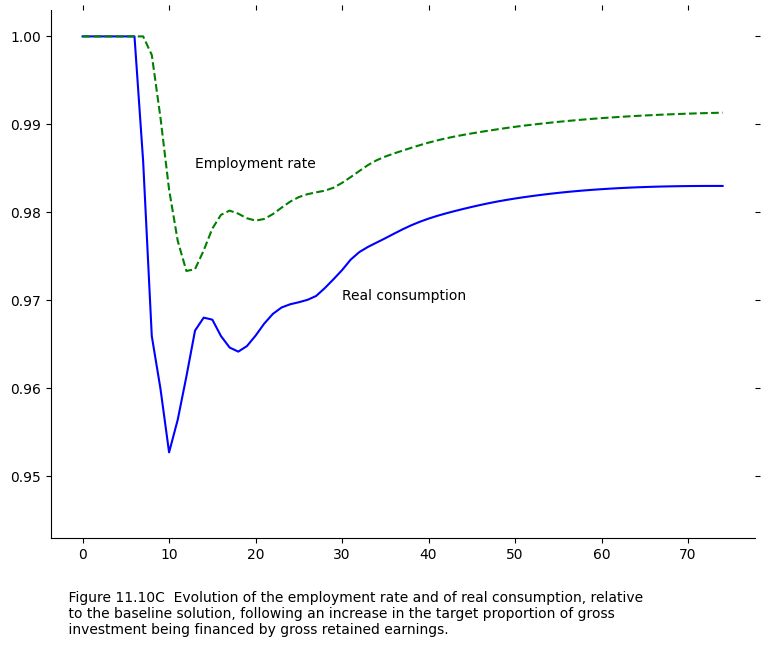

In [50]:
caption = '''
    Figure 11.10C  Evolution of the employment rate and of real consumption, relative
    to the baseline solution, following an increase in the target proportion of gross
    investment being financed by gross retained earnings.'''

ckdata = list()
erdata = list()
for i in range(5, 80):
    s = psiu.solutions[i]
    base = baseline.solutions[i]
    
    ckdata.append(s['Ck']/base['Ck'])
    erdata.append(s['ER']/base['ER'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.943, 1.003)

axes.plot(ckdata, linestyle='-', color='b')
axes.plot(erdata, linestyle='--', color='g')

# add labels
plt.text(30, 0.97, 'Real consumption')
plt.text(13, 0.985, 'Employment rate')
fig.text(0.1, -.1, caption);

###### Figure 11.10D

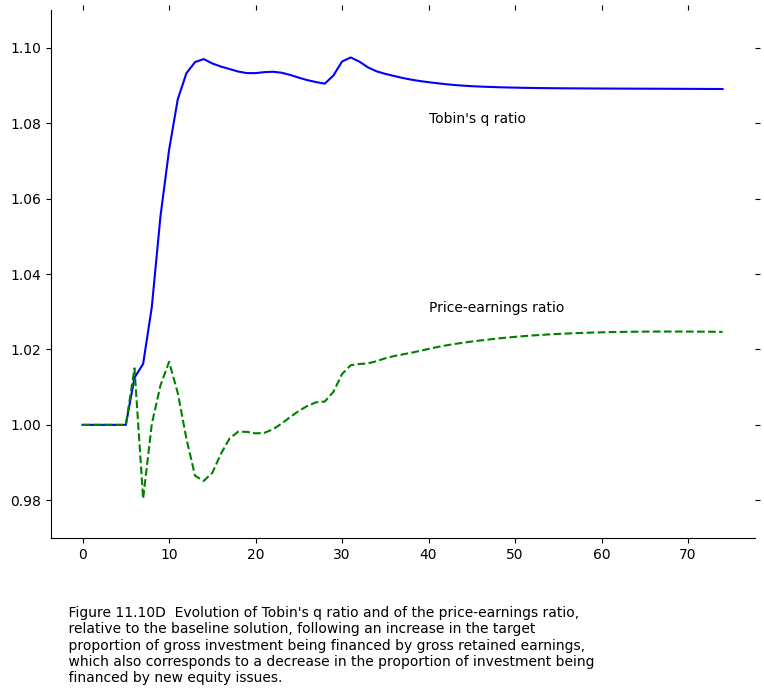

In [51]:
caption = '''
    Figure 11.10D  Evolution of Tobin's q ratio and of the price-earnings ratio,
    relative to the baseline solution, following an increase in the target
    proportion of gross investment being financed by gross retained earnings,
    which also corresponds to a decrease in the proportion of investment being
    financed by new equity issues.'''

qdata = list()
pedata = list()
for i in range(5, 80):
    s = psiu.solutions[i]
    base = baseline.solutions[i]
    
    qdata.append(s['Q']/base['Q'])
    pedata.append(s['PE']/base['PE'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.97, 1.11)

axes.plot(qdata, linestyle='-', color='b')
axes.plot(pedata, linestyle='--', color='g')

# add labels
plt.text(40, 1.08, "Tobin's q ratio")
plt.text(40, 1.03, 'Price-earnings ratio')
fig.text(0.1, -.2, caption);

###### Figure 11.10E

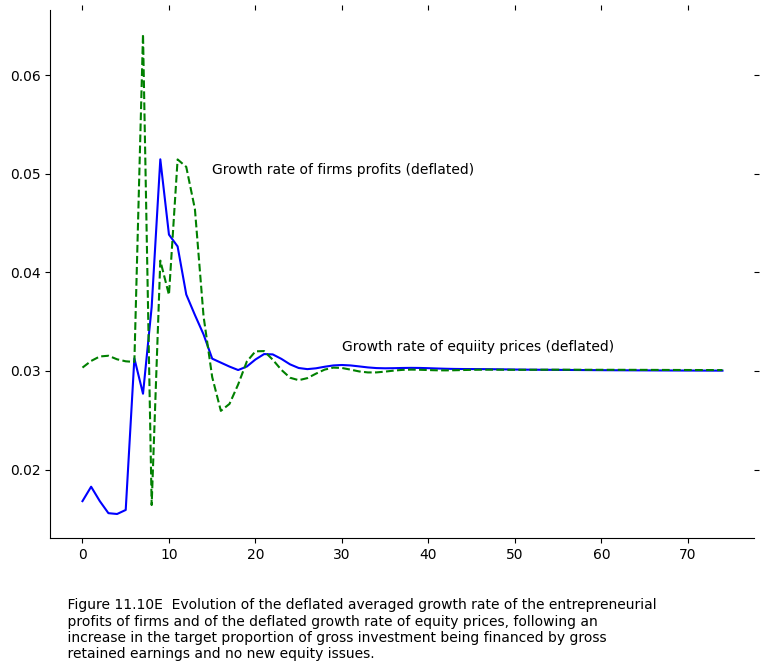

In [52]:
caption = '''
    Figure 11.10E  Evolution of the deflated averaged growth rate of the entrepreneurial
    profits of firms and of the deflated growth rate of equity prices, following an
    increase in the target proportion of gross investment being financed by gross
    retained earnings and no new equity issues.'''

pedata = list()
prdata = list()
for i in range(5, 80):
    s = psiu.solutions[i]
    s_1 = psiu.solutions[i-1]
    
    pedata.append(((s['Pe']/s['P'])/(s_1['Pe']/s_1['P'])) - 1)
    prdata.append(((s['Ff']/s['P'])/(s_1['Ff']/s_1['P'])) - 1)

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(pedata, linestyle='-', color='b')
axes.plot(prdata, linestyle='--', color='g')

# add labels
plt.text(30, 0.032, 'Growth rate of equiity prices (deflated)')
plt.text(15, 0.05, 'Growth rate of firms profits (deflated)')
fig.text(0.1, -.15, caption);

### Scenario: Model GROWTH, an increase in the percentage of defaulting loans

In [53]:
nplk = create_growth_model()
nplk.set_values(growth_parameters)
nplk.set_values(growth_exogenous)
nplk.set_values(growth_variables)
    
for _ in range(10):
    nplk.solve(iterations=200, threshold=1e-6)

nplk.set_values({'NPLk': 0.05})

for _ in range(90):
    nplk.solve(iterations=200, threshold=1e-6)


###### Figure 11.11A

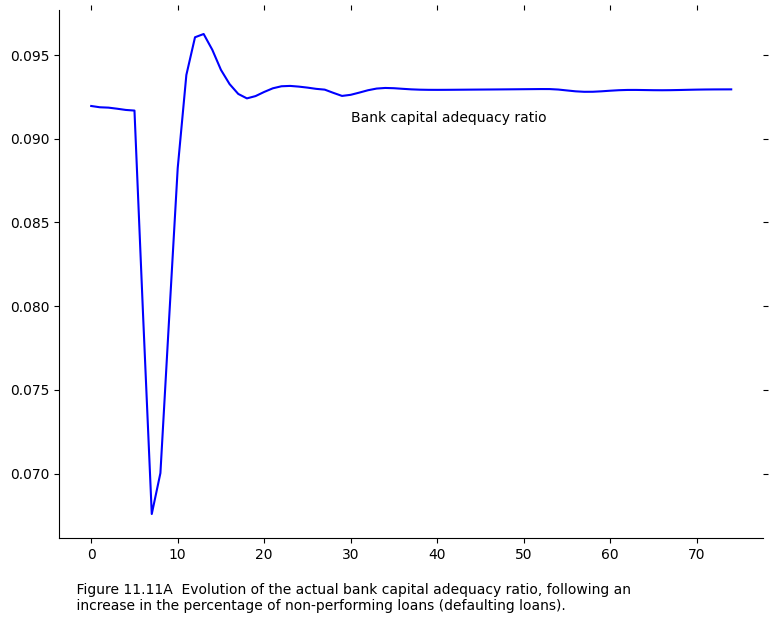

In [54]:
caption = '''
    Figure 11.11A  Evolution of the actual bank capital adequacy ratio, following an
    increase in the percentage of non-performing loans (defaulting loans).'''

data = [s['CAR'] for s in nplk.solutions[5:80]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(data, linestyle='-', color='b')

# add labels
plt.text(30, 0.091, 'Bank capital adequacy ratio')
fig.text(0.1, -.05, caption);

###### Figure 11.11B

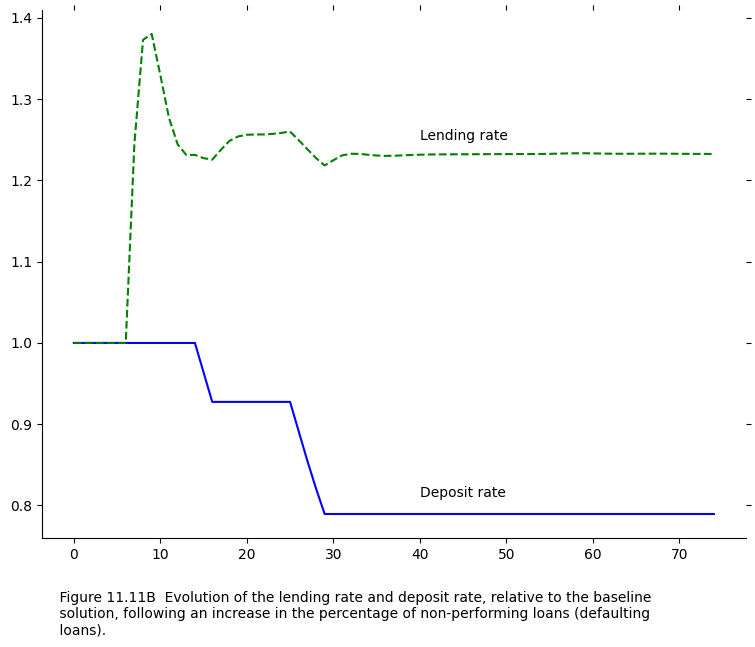

In [55]:
caption = '''
    Figure 11.11B  Evolution of the lending rate and deposit rate, relative to the baseline
    solution, following an increase in the percentage of non-performing loans (defaulting
    loans).'''

rmdata = list()
rldata = list()
for i in range(5, 80):
    s = nplk.solutions[i]
    base = baseline.solutions[i]

    rmdata.append(s['Rm']/base['Rm'])
    rldata.append(s['Rl']/base['Rl'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(rmdata, linestyle='-', color='b')
axes.plot(rldata, linestyle='--', color='g')

# add labels
plt.text(40, 0.81, 'Deposit rate')
plt.text(40, 1.25, 'Lending rate')
fig.text(0.1, -.1, caption);

### Scenario: Model GROWTH, an increase in the normal adequacy ratio

In [56]:
ncar = create_growth_model()
ncar.set_values(growth_parameters)
ncar.set_values(growth_exogenous)
ncar.set_values(growth_variables)

for _ in range(10):
    ncar.solve(iterations=200, threshold=1e-6)

ncar.set_values({'NCAR': 0.11})

for _ in range(90):
    ncar.solve(iterations=200, threshold=1e-6)


###### Figure 11.11C

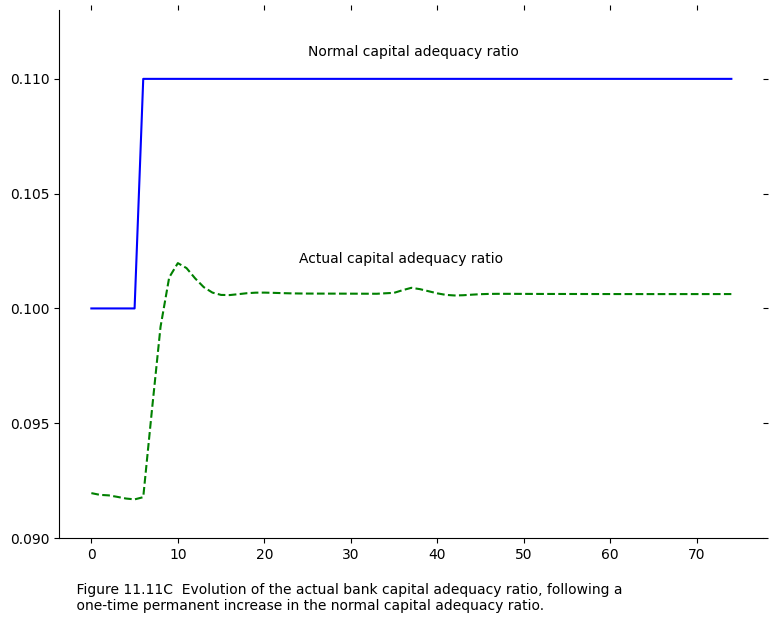

In [57]:
caption = '''
    Figure 11.11C  Evolution of the actual bank capital adequacy ratio, following a
    one-time permanent increase in the normal capital adequacy ratio.'''

ncardata = [s['NCAR'] for s in ncar.solutions[5:80]]
cardata = [s['CAR'] for s in ncar.solutions[5:80]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.09, 0.113)

axes.plot(ncardata, linestyle='-', color='b')
axes.plot(cardata, linestyle='--', color='g')

# add labels
plt.text(25, 0.111, 'Normal capital adequacy ratio')
plt.text(24, 0.102, 'Actual capital adequacy ratio')
fig.text(0.1, -.05, caption);

###### Figure 11.11D

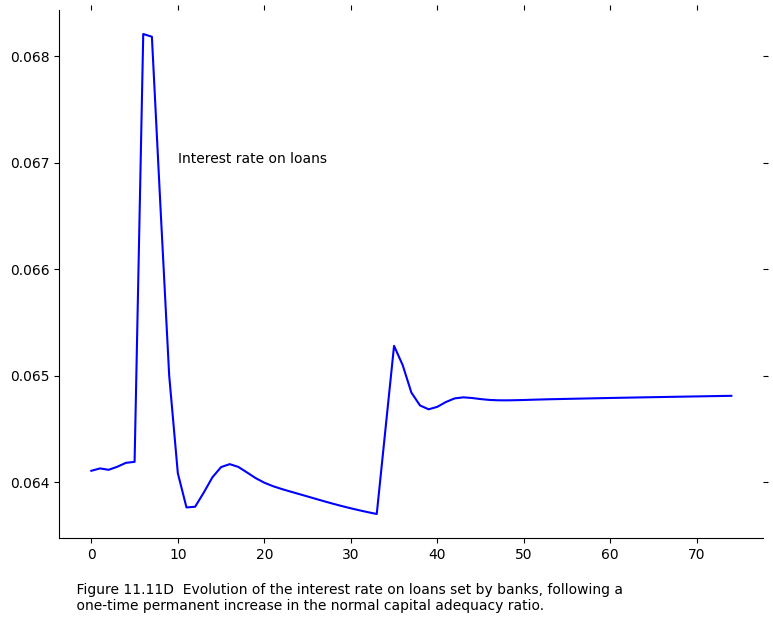

In [58]:
caption = '''
    Figure 11.11D  Evolution of the interest rate on loans set by banks, following a
    one-time permanent increase in the normal capital adequacy ratio.'''

data = [s['Rl'] for s in ncar.solutions[5:80]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(data, linestyle='-', color='b')

# add labels
plt.text(10, 0.067, 'Interest rate on loans')
fig.text(0.1, -.05, caption);